#Disclaimer Dataset hanya sampai tahun 2020

# Initialize and Download Dataset

In [ ]:
!pip install gdown -q

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1M553beXlYuXC7FdSEoTr4SVGFWjeOtGh'
file_path = 'data.csv'
gdown.download(url, file_path, quiet=True)
url = 'https://drive.google.com/uc?id=1R0dV9mCgPPJvqcttIzeiMHS2YLtAI6ud'
file_path = 'test.csv'
gdown.download(url, file_path, quiet=True)

'test.csv'

# Libraries Used

In [ ]:
# Install libraries
!pip install fasttext -q
!pip install sastrawi -q
!pip install emoji -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install langdetect -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# import libraries
import sklearn # Our library for TF-IDF, SVM, and Random forest
import fasttext # Our library for fasttext model
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import os
from sklearn.metrics.pairwise import cosine_similarity
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from langdetect import detect
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Exploratory Data Analysis

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4231 non-null   int64 
 1   label             4231 non-null   int64 
 2   tanggal           4231 non-null   object
 3   judul             4231 non-null   object
 4   narasi            4231 non-null   object
 5   nama file gambar  4231 non-null   object
dtypes: int64(2), object(4)
memory usage: 198.5+ KB


In [ ]:
df.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [ ]:
df[df["label"] == 0]

,ID,label,judul,narasi,nama file gambar,judul_length,narasi_length,file_extension
tanggal,,,,,,,,
2017-10-25,6775,0,Sandi Sarankan Warga Ngadu ke Kelurahan Saja,Astaga! Sandiaga Sarankan Warga Ngadu ke Kelur...,6775.jpg,44,80,.jpg
2017-07-13,7038,0,"Irina, Istri Ahli IT Hermansyah disebut Mantan...","Irina, Istri Ahli IT Hermansyah disebut Mantan...",7038.jpg,50,50,.jpg
2017-03-08,7214,0,"Nezar Patria adalah Kader PKI, Ikut Rapat Seti...","Nezar Patria adalah Kader PKI, Ikut Rapat Seti...",7214.jpg,123,123,.jpg
2018-07-17,13483,0,Coach Indra Sjafri: Saya Pernah 1 Tahun Tak Di...,Kendati sukses mengantarkan Timnas Indonesia U...,13483.png,63,123,.png
2018-04-28,13907,0,Kronologis Polisi Berondong Sedan Terobos Razi...,"Innalillah… Hanya Karena Lalai Terobos Razia, ...",13907.png,63,107,.png
...,...,...,...,...,...,...,...,...
2018-02-21,989180,0,Apabila Kalian Telah Menangkap PKI yang Pura-P...,"menghimbau kpd seluruh rakyat indonesia ,, Apa...",989180.png,85,144,.png
2016-12-07,990726,0,Rela Berkorban demi Jihad Goban,Mikir Loe ?\n Munarman Panglima ISIS Indonesia...,990726.jpg,31,106,.jpg
2018-10-18,995906,0,PIDATO ANIES BASWEDAN DALAM PESTA RAKYAT PELAN...,"INILAH PIDATO ANIES BASWEDAN, GUBERNUR DKI JAK...",995906.jpg,60,117,.jpg


In [ ]:
df.shape

(4231, 6)

In [ ]:
df.describe(include=['O'])

,tanggal,judul,narasi,nama file gambar
count,4231,4231,4231,4231
unique,1339,4219,4209,4231
top,16-Mar-20,Foto Sekarang malesiya sapu habis penduduk asi...,Cek tangkapan layar.,71.jpg
freq,18,2,5,1


In [ ]:
panjang_judul_rata_rata = df['judul'].apply(lambda x: len(x.split())).mean()
round(panjang_judul_rata_rata, 1)

9.0

In [ ]:
panjang_narasi_rata_rata = df['narasi'].apply(lambda x: len(x.split())).mean()
round(panjang_narasi_rata_rata, 1)

26.0

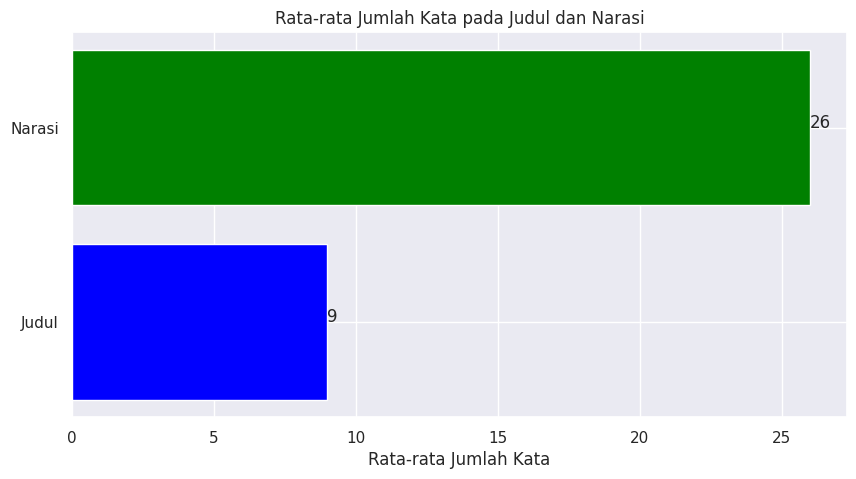

In [ ]:
# Plot the average word counts
avg_word_counts = [round(panjang_judul_rata_rata), round(panjang_narasi_rata_rata)]
categories = ['Judul', 'Narasi']

plt.figure(figsize=(10, 5))
plt.barh(categories, avg_word_counts, color=['blue', 'green'])
plt.xlabel('Rata-rata Jumlah Kata')
plt.title('Rata-rata Jumlah Kata pada Judul dan Narasi')
for index, value in enumerate(avg_word_counts):
    plt.text(value, index, str(value))
plt.show()

In [ ]:
tahun_tahun = df['tanggal'].str[-2:].value_counts().sort_index()
years = tahun_tahun.index.tolist()  # a list of years
counts = tahun_tahun.values  # a corresponding list of counts
print(f"{years} : {counts}")

['15', '16', '17', '18', '19', '20'] : [  47  260  606 1069 1018 1231]


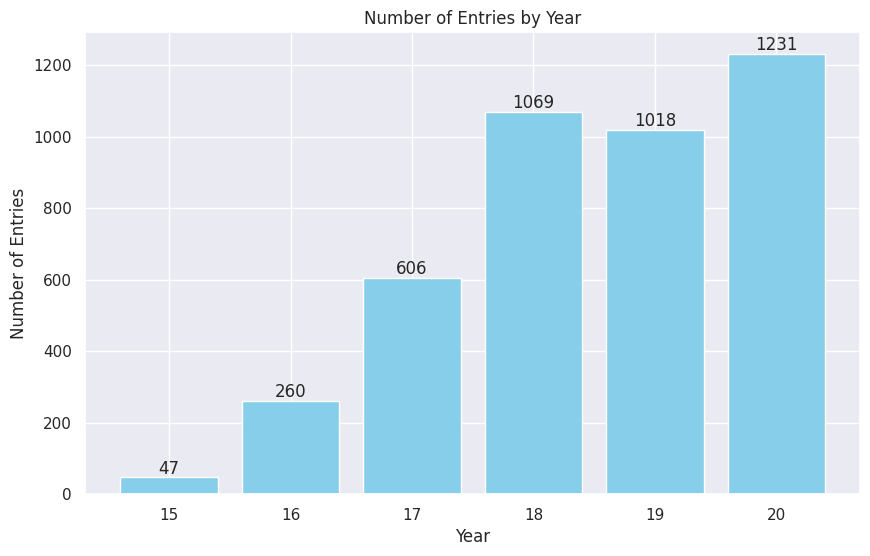

In [ ]:
sorted_indices = sorted(range(len(years)), key=lambda k: years[k])
years = [years[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Number of Entries by Year')

# Add text labels on the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
jumlah_modus_tahun = tahun_tahun.mode()
jumlah_median_tahun = tahun_tahun.median()
modus_tahun = tahun_tahun[tahun_tahun==jumlah_modus_tahun.iloc[-1]]
median_tahun = abs(tahun_tahun-jumlah_median_tahun).idxmin()
print(f"Modus tahun keluar: {modus_tahun.index[0]}")
print(f"Median tahun keluar: {int(median_tahun)}")

Modus tahun keluar: 20
Median tahun keluar: 17


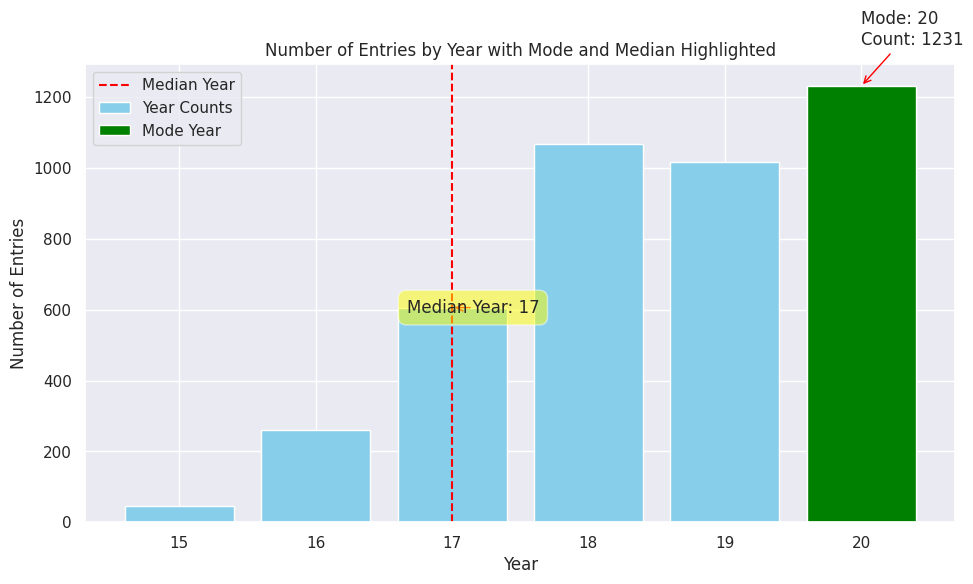

In [ ]:
tahun_tahun_sorted = tahun_tahun.sort_index()
years = tahun_tahun_sorted.index
counts = tahun_tahun_sorted.values

# Calculated mode and median year
modus_tahun = modus_tahun.index[0]
median_tahun = abs(tahun_tahun-jumlah_median_tahun).idxmin()

# Count for the mode year for plotting
mode_count = tahun_tahun_sorted[modus_tahun]

# Find the position of the median year to plot a vertical line
median_count = tahun_tahun_sorted[median_tahun]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the bar chart for years
plt.bar(years, counts, color='skyblue', label='Year Counts')

# Highlight the mode year
plt.bar(modus_tahun, mode_count, color='green', label='Mode Year')

# Annotate the mode year
plt.annotate(f'Mode: {modus_tahun}\nCount: {mode_count}',
             xy=(modus_tahun, mode_count),
             xytext=(0, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'))

# If the median year is a specific year, plot a vertical line and annotate
median_year_index = list(years).index(median_tahun)
plt.axvline(x=median_year_index, color='red', linestyle='--', label='Median Year')

# Annotate the median year line
plt.annotate(f'Median Year: {median_tahun}',
             xy=(median_year_index, median_count),
             xytext=(15, 0),
             textcoords='offset points',
             ha='center', va='center',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->', color='red'))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Number of Entries by Year with Mode and Median Highlighted')
plt.legend()

plt.tight_layout()
plt.show()

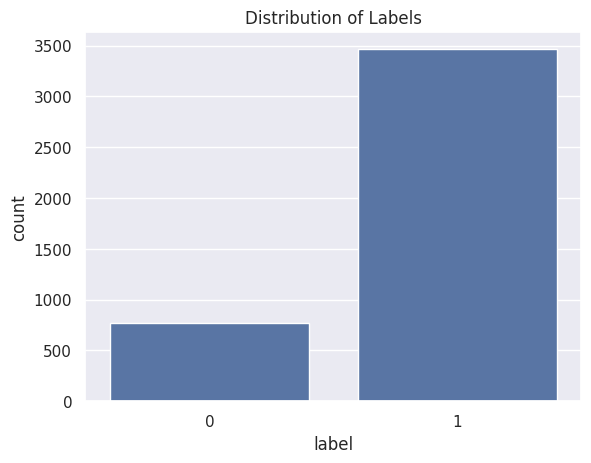

In [ ]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

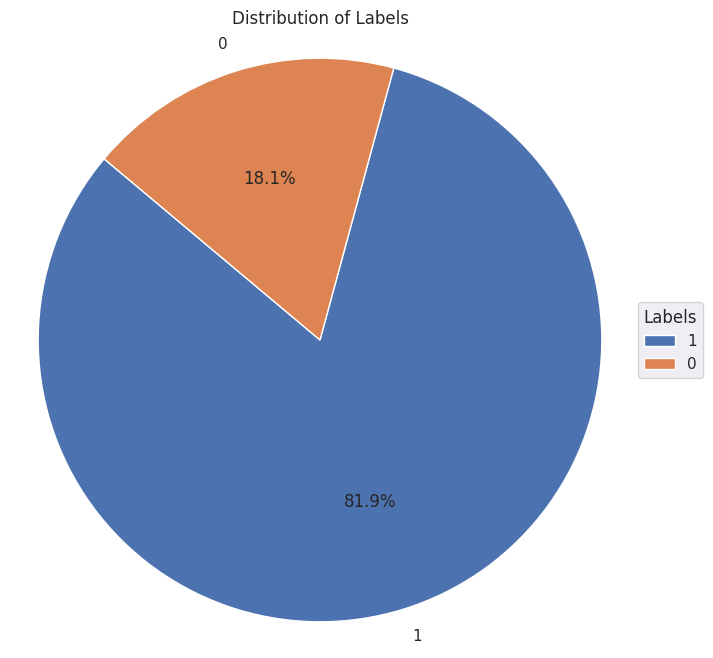

In [ ]:
# Get the counts of each label
label_counts = df['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')

plt.legend(label_counts.index, title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [ ]:
# Imabalanced ratio
print(f"Imabalanced Ratio: {label_counts.max()/label_counts.min()}")

Imabalanced Ratio: 4.523498694516971


In [ ]:
#Finding the trend over time
bulan_mapping = {
    'Jan': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Apr': 'Apr', 'Mei': 'May', 'Jun': 'Jun',
    'Jul': 'Jul', 'Agu': 'Aug', 'Sep': 'Sep', 'Okt': 'Oct', 'Nov': 'Nov', 'Des': 'Dec'
}

for bulan_ind, bulan_eng in bulan_mapping.items():
    df['tanggal'] = df['tanggal'].str.replace(bulan_ind, bulan_eng, regex=True)

df['tanggal'] = pd.to_datetime(df['tanggal'], format='%d-%b-%y')

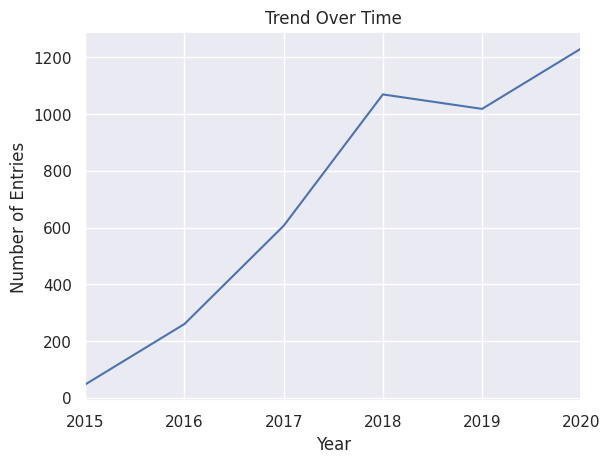

In [ ]:
#Resampling by Year
df.set_index('tanggal', inplace=True)
df.resample('Y').size().plot()
plt.title('Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.show()

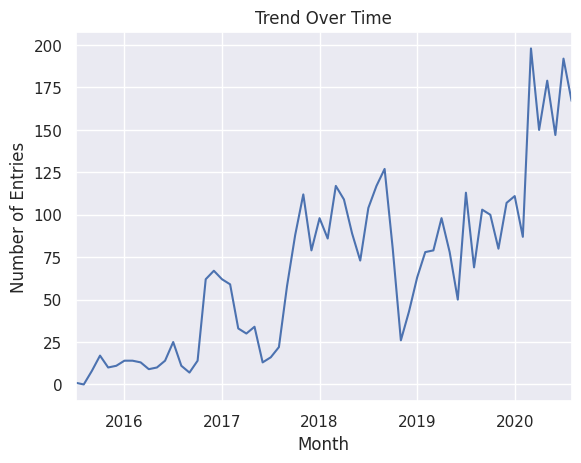

In [ ]:
#Resampling by Month
df.resample('M').size().plot()
plt.title('Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.show()

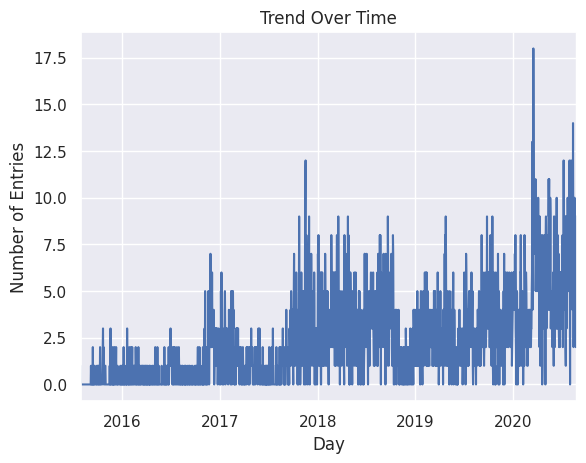

In [ ]:
#Resampling by Day
df.resample('D').size().plot()
plt.title('Trend Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Entries')
plt.show()

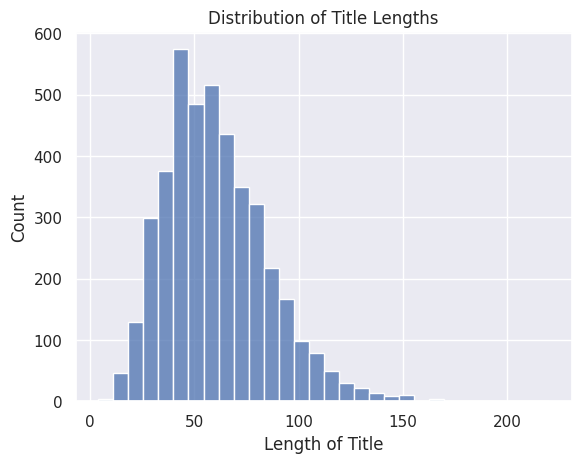

In [ ]:
df['judul_length'] = df['judul'].apply(len)
sns.histplot(df['judul_length'], bins=30)
plt.title('Distribution of Title Lengths')
plt.xlabel('Length of Title')
plt.show()

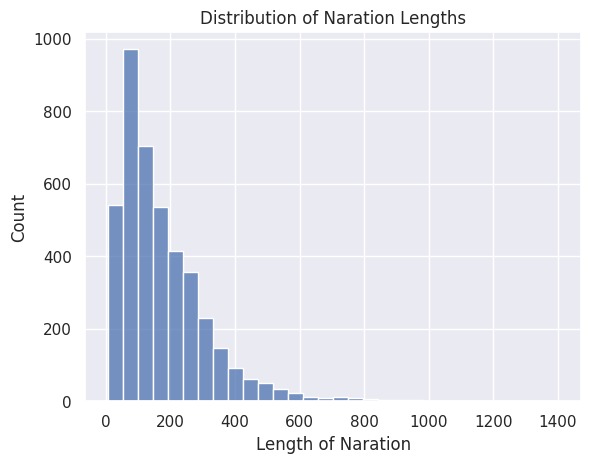

In [ ]:
df['narasi_length'] = df['narasi'].apply(len)
sns.histplot(df['narasi_length'], bins=30)
plt.title('Distribution of Naration Lengths')
plt.xlabel('Length of Naration')
plt.show()

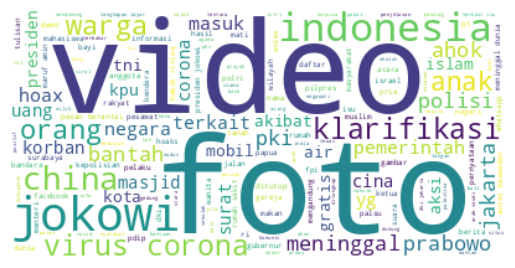

In [ ]:
stop_words = set(stopwords.words('indonesian'))

# Combine semua 'judul' text menjadi satu string dan remove stopwords
text = " ".join(judul for judul in df['judul'].dropna())
text_words = text.lower().split()
filtered_text = " ".join(word for word in text_words if word not in stop_words and word.isalpha())

# Generate the word cloud using the filtered text
wordcloud = WordCloud(background_color="white").generate(filtered_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

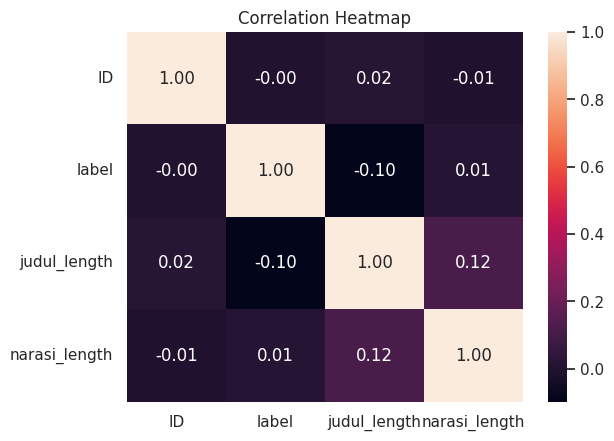

In [ ]:
#numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

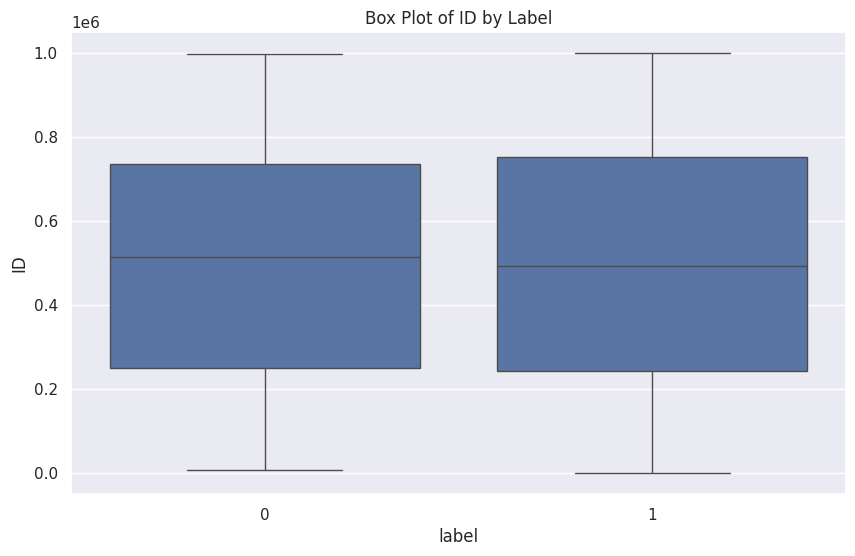

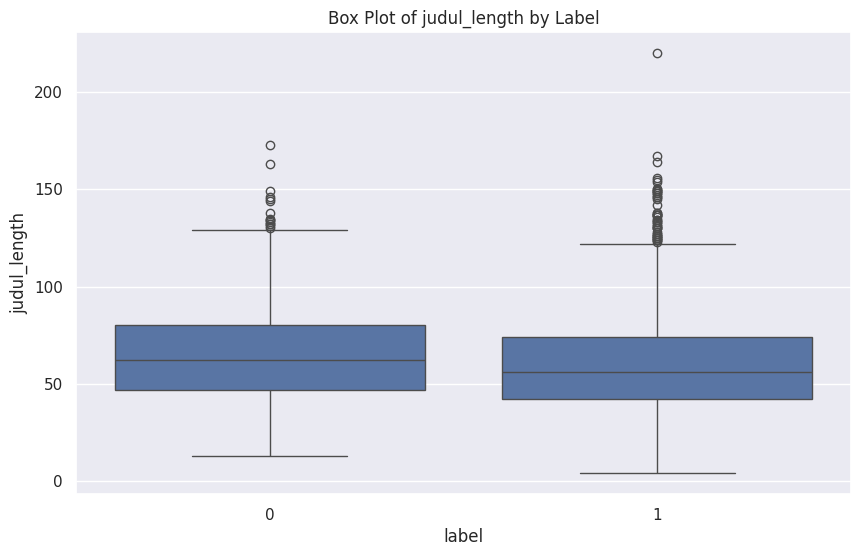

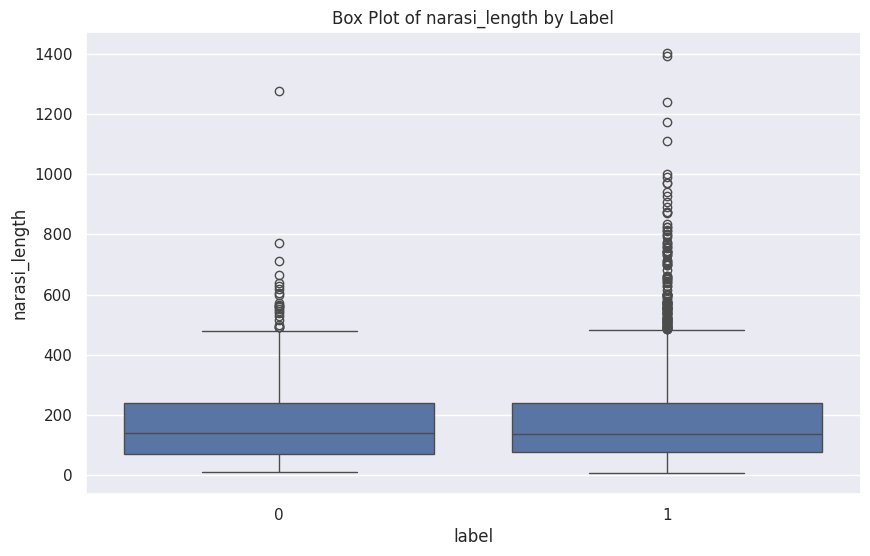

In [ ]:
#Box Plot Numerical Column by Label
for column in numerical_df.columns:
    if column != 'label':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='label', y=column, data=df)
        plt.title(f'Box Plot of {column} by Label')
        plt.show()

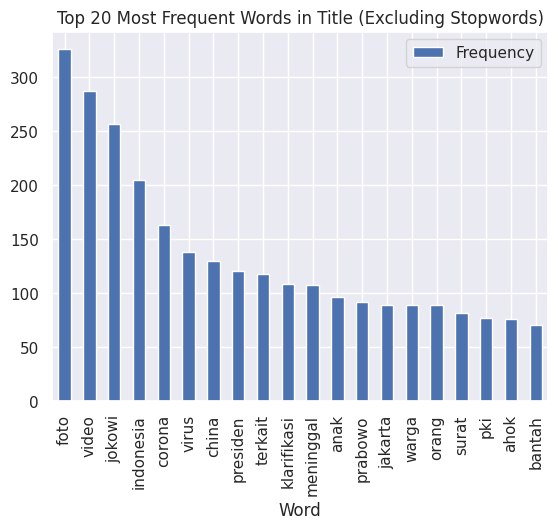

In [ ]:
# Tokenize the 'judul' text and remove stopwords
all_words = ' '.join(df['judul'].dropna()).lower().split()
filtered_words = [word for word in all_words if word not in stop_words and word.isalpha()]

# Count the occurrences of each word
word_freq = Counter(filtered_words)

# Create a DataFrame with the word frequencies
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot the most frequent words
word_freq_df.head(20).plot(x='Word', y='Frequency', kind='bar')
plt.title('Top 20 Most Frequent Words in Title (Excluding Stopwords)')
plt.show()

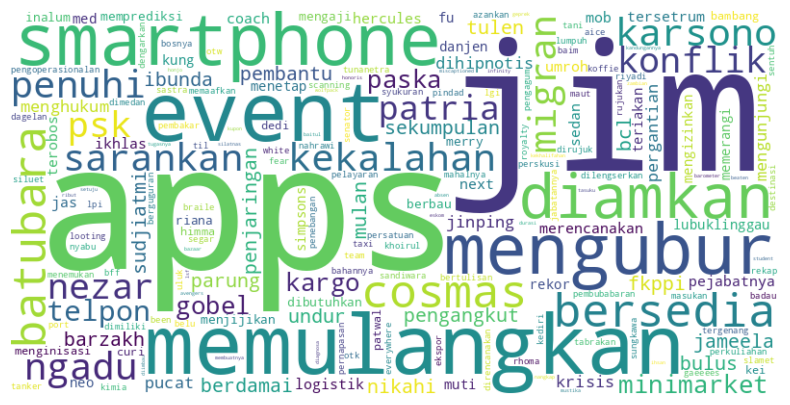

In [ ]:
# Check for OOV (out-of-vocabulary) words
rare_words = {word: count for word, count in word_freq.items() if count == 1}

OOV_WordCloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(rare_words)
plt.figure(figsize=(10,5))
plt.imshow(OOV_WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#WordCloud besar-> Berdasarkan urutan muncul di dictionary rare_words

In [ ]:
for word in list(rare_words)[:10]:
  print(word)

apps
jim
memulangkan
event
smartphone
mengubur
diamkan
bersedia
cosmas
batubara


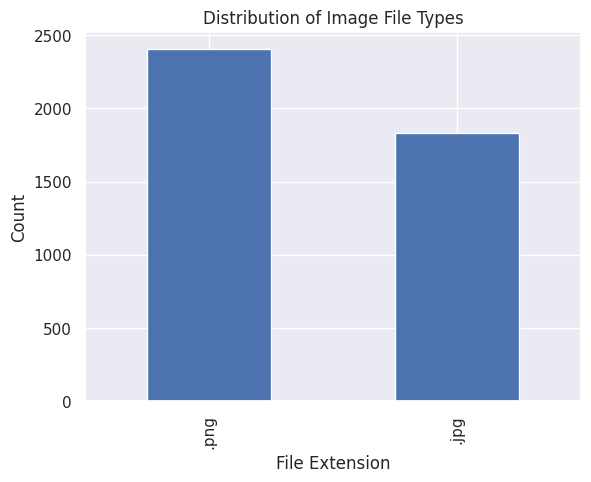

In [ ]:
# Distribution of Image File Types
df['file_extension'] = df['nama file gambar'].str.extract(r'(\.\w+)$')[0]
file_type_counts = df['file_extension'].value_counts()

file_type_counts.plot(kind='bar')
plt.title('Distribution of Image File Types')
plt.xlabel('File Extension')
plt.ylabel('Count')
plt.show()

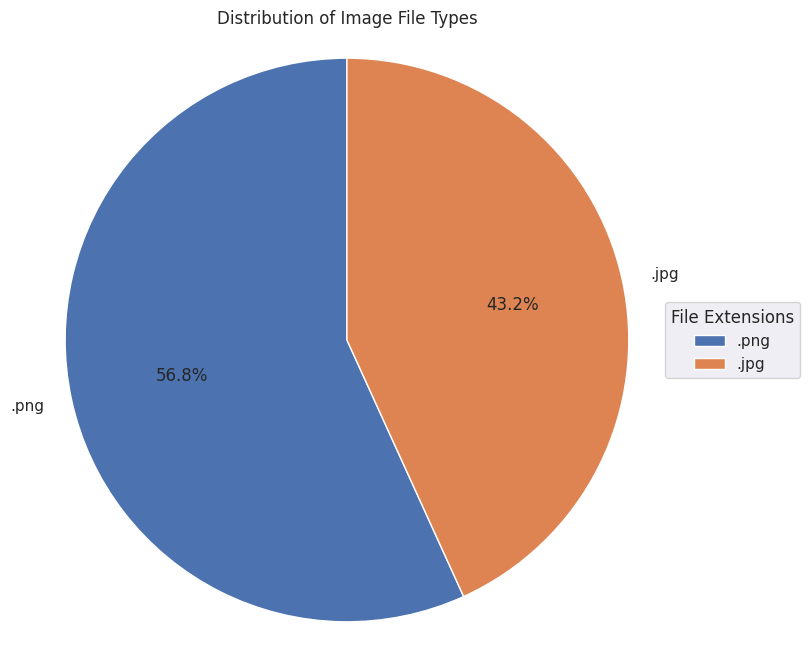

In [ ]:
# Distribution of Image File Types
df['file_extension'] = df['nama file gambar'].str.extract(r'(\.\w+)$')[0]
file_type_counts = df['file_extension'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(file_type_counts, labels=file_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Image File Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Optional: add a legend if you have many file types
plt.legend(file_type_counts.index, title="File Extensions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [ ]:
#Distribution of language types if any
def detect_languages(text):
  try:
    return detect(text)
  except:
    return 'Unknown'

# Make temporary dataframe for languages
tmp_df = df.copy()

tmp_df['languages_narasi'] = tmp_df['narasi'].apply(detect_languages)
tmp_df['languages_judul'] = tmp_df['judul'].apply(detect_languages)

In [ ]:
print("Languages example in narasi data:\n")
for lang in tmp_df['languages_narasi'].unique():
    example_text = tmp_df[tmp_df['languages_narasi'] == lang]['narasi'].iloc[0]  # Get the first example of each language
    print(f"Language: {lang}, Example: {example_text}")

print("\nLangauges example in judul data:\n\n")
for lang in tmp_df['languages_judul'].unique():
    example_text = tmp_df[tmp_df['languages_judul'] == lang]['judul'].iloc[0]  # Get the first example of each language
    print(f"Language: {lang}, Example: {example_text}")

Languages example in narasi data:

Language: en, Example: A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔
Language: id, Example: Yth.Seluruh Anggota Grup Sesuai Instruksi Gubernur Jawa Tengah Hasil Rapat Tim Gugus Tugas Covid 19 Jateng sbb:
Language: tl, Example: Kadrun kalo lihat foto ini panas dingin . .
Language: so, Example: LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UNTUK MENGUASAI NEGRI INI!
Language: hu, Example: CORONA IS A HOAX
Language: de, Example: ASTAGHFIRULLAH, KEMARIN “BERSAMA KITA LAWAN VIRUS CORONA” SEKARANG “AYO KITA BER

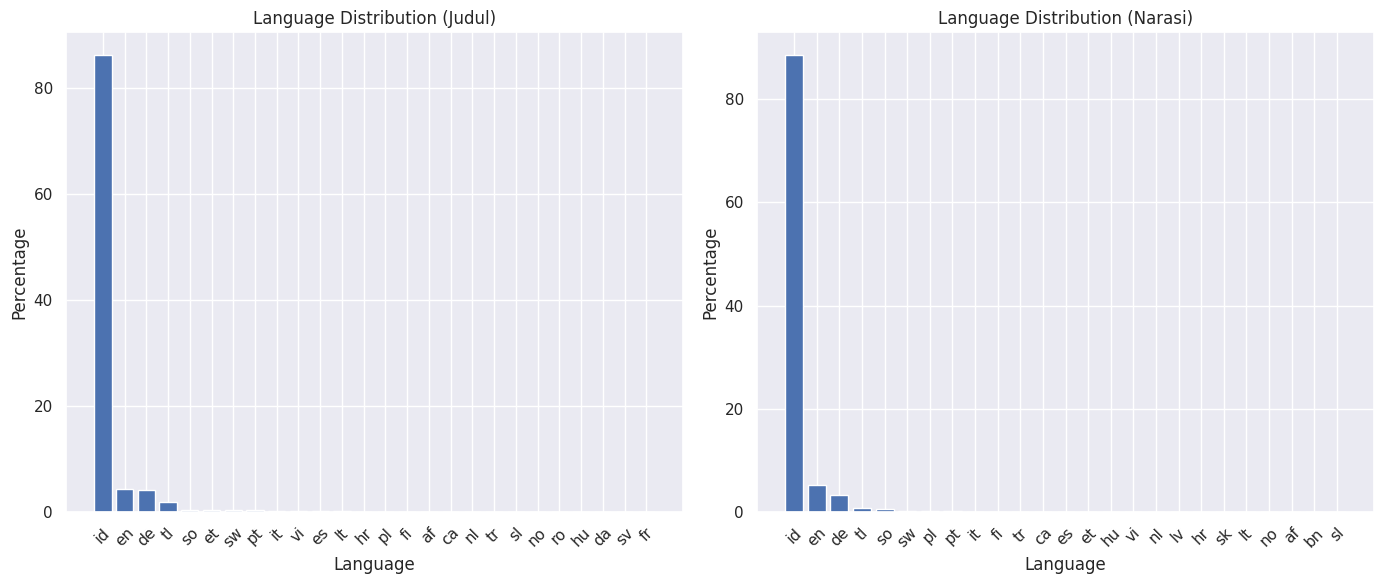

In [ ]:
language_distribution_judul = tmp_df['languages_judul'].value_counts(normalize=True) * 100
language_distribution_narasi = tmp_df['languages_narasi'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(language_distribution_judul.index, language_distribution_judul.values)
axes[0].set_xlabel('Language')
axes[0].set_ylabel('Percentage')
axes[0].set_title('Language Distribution (Judul)')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(language_distribution_narasi.index, language_distribution_narasi.values)
axes[1].set_xlabel('Language')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Language Distribution (Narasi)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
compare_df = pd.concat([pd.DataFrame(language_distribution_judul),pd.DataFrame(language_distribution_narasi)],axis=1)
print(compare_df)

    proportion  proportion
id   86.220752   88.513354
en    4.325219    5.317892
de    4.254313    3.403451
tl    1.938076    0.803593
so    0.401796    0.614512
et    0.354526    0.070905
sw    0.354526    0.165446
pt    0.354526    0.141810
it    0.236351    0.118175
vi    0.189081    0.070905
es    0.189081    0.070905
lt    0.189081    0.023635
hr    0.118175    0.023635
pl    0.118175    0.165446
fi    0.118175    0.070905
af    0.094540    0.023635
ca    0.070905    0.070905
nl    0.070905    0.047270
tr    0.070905    0.070905
sl    0.070905    0.023635
no    0.047270    0.023635
ro    0.047270         NaN
hu    0.047270    0.070905
da    0.047270         NaN
sv    0.047270         NaN
fr    0.023635         NaN
lv         NaN    0.047270
sk         NaN    0.023635
bn         NaN    0.023635


# Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4231 entries, 2020-08-17 to 2020-07-20
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4231 non-null   int64 
 1   label             4231 non-null   int64 
 2   judul             4231 non-null   object
 3   narasi            4231 non-null   object
 4   nama file gambar  4231 non-null   object
 5   judul_length      4231 non-null   int64 
 6   narasi_length     4231 non-null   int64 
 7   file_extension    4231 non-null   object
dtypes: int64(4), object(4)
memory usage: 297.5+ KB


In [ ]:
# Seperate indonesian text with others
indiciesToDrop = []

for i, row in df.iterrows():
  if detect(row['narasi']) != 'id' or detect(row['judul']) != 'id':
    indiciesToDrop.append(i)

filtered = df.drop(indiciesToDrop)

In [ ]:
filtered.reset_index(inplace=True)
filtered

,tanggal,ID,label,judul,narasi,nama file gambar,judul_length,narasi_length,file_extension
0,2020-07-17,461,1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png,131,111,.png
1,2020-07-08,550,1,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png,104,773,.png
2,2019-12-24,2226,1,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...,2226.png,77,226,.png
3,2019-10-13,2588,1,"Akhirnya, Jokowi bersedia mengundurkan diri","Akhirnya, Jokowi bersedia mengundurkan diri.\n...",2588.png,43,65,.png
4,2019-07-29,2987,1,Dirut PT Agung Podomoro Land Cosmas Batubara M...,Turut berduka cita atas\n meninggalnya Pejuang...,2987.png,60,221,.png
...,...,...,...,...,...,...,...,...,...
1724,2018-04-14,997067,1,Lihat Antrian Panjang Anak Negeri Mau Melamar ...,LIHAT ANTRIAN PANJANG ANAK NEGERI INI MAU MELA...,997067.png,67,449,.png
1725,2017-05-26,998297,1,Pengacara Hotman Paris Hutapea Jadi Kuasa Huku...,Pengacara Hotman Paris Hutapea Jadi Kuasa Huku...,998297.jpg,67,67,.jpg
1726,2017-05-21,998306,1,: Kemendagri Cabut Perda Minuman Keras,Kegeraman sudah memuncak. Inikah kado kebangki...,998306.png,38,203,.png
1727,2016-03-03,999251,1,Jembatan Soekarno-Hatta di Kota Malang Melengkung,Jembatan Soekarno-Hatta di Kota Malang Melengkung,999251.jpg,49,49,.jpg


In [ ]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           1729 non-null   datetime64[ns]
 1   ID                1729 non-null   int64         
 2   label             1729 non-null   int64         
 3   judul             1729 non-null   object        
 4   narasi            1729 non-null   object        
 5   nama file gambar  1729 non-null   object        
 6   judul_length      1729 non-null   int64         
 7   narasi_length     1729 non-null   int64         
 8   file_extension    1729 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 121.7+ KB


In [ ]:
# Remove any emojis
import emoji
#Filter any emojis

def extract_emojis(text):
  return ''.join(c for c in text if emoji.is_emoji(c))

emoji_in_df = filtered[filtered['judul'].apply(lambda x: extract_emojis(x) != '') | filtered['narasi'].apply(lambda x: extract_emojis(x) != '')]

In [ ]:
emoji_in_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 57 to 1667
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           37 non-null     datetime64[ns]
 1   ID                37 non-null     int64         
 2   label             37 non-null     int64         
 3   judul             37 non-null     object        
 4   narasi            37 non-null     object        
 5   nama file gambar  37 non-null     object        
 6   judul_length      37 non-null     int64         
 7   narasi_length     37 non-null     int64         
 8   file_extension    37 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 2.9+ KB


There is 72 rows that contains emoji, lets remove them

In [ ]:
def remove_emoji(text):
  return emoji.replace_emoji(text,replace = '')

In [ ]:
cleaned_df = filtered.copy()
cleaned_df['judul']= filtered['judul'].apply(remove_emoji)
cleaned_df['narasi'] = cleaned_df['narasi'].apply(remove_emoji)

In [ ]:
cleaned_df[cleaned_df['judul'].apply(lambda x: extract_emojis(x) != '') | cleaned_df['narasi'].apply(lambda x: extract_emojis(x) != '')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           0 non-null      datetime64[ns]
 1   ID                0 non-null      int64         
 2   label             0 non-null      int64         
 3   judul             0 non-null      object        
 4   narasi            0 non-null      object        
 5   nama file gambar  0 non-null      object        
 6   judul_length      0 non-null      int64         
 7   narasi_length     0 non-null      int64         
 8   file_extension    0 non-null      object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 0.0+ bytes


In [ ]:
# Stemmer and stopwords
stemmer = StemmerFactory().create_stemmer()
nltk_stopwords = set(stopwords.words('indonesian')) #nltk version
sastrawi_stopwords = set(StopWordRemoverFactory().get_stop_words()) #Sastrawi version
stop_words = nltk_stopwords.union(sastrawi_stopwords) #Combined
stop_words = list(stop_words) # Make it back into a list
stop_words += ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya']

In [ ]:
X = cleaned_df['narasi'] + ' ' + cleaned_df['judul']
X = X.to_frame()
y = cleaned_df['label']

In [ ]:
X

,0
0,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...
1,"Maaf Mas2 dan Mbak2, ini bukan politik, tapi k..."
2,Polisi china telah menganiaya wanita uighur le...
3,"Akhirnya, Jokowi bersedia mengundurkan diri.\n..."
4,Turut berduka cita atas\n meninggalnya Pejuang...
...,...
1724,LIHAT ANTRIAN PANJANG ANAK NEGERI INI MAU MELA...
1725,Pengacara Hotman Paris Hutapea Jadi Kuasa Huku...
1726,Kegeraman sudah memuncak. Inikah kado kebangki...
1727,Jembatan Soekarno-Hatta di Kota Malang Melengk...


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1724    1
1725    1
1726    1
1727    1
1728    1
Name: label, Length: 1729, dtype: int64

In [ ]:
word_lists = []
for text in X[0]:
  word_list = [stemmer.stem(word) for word in word_tokenize(text.lower()) if word not in punctuation and word not in stop_words and word.isalpha()]
  processed_text = ' '.join(word_list)
  word_lists.append(processed_text)

# Make temp files to train fasttext
train_path = 'train_text.txt'

# Export to text
with open(train_path, 'w') as file:
    for text in word_lists:
      file.write(text+'\n')


## Embeddings

In [ ]:
# -> Balance data based on labels
# In this case i am using SMOTEEN (SMOTE with ENN)
from imblearn.combine import SMOTETomek
resample = SMOTETomek(random_state=7873)

## Fasttext

In [ ]:
# Combined word embedding for training data for fasttext mode
model_fasttext = fasttext.train_unsupervised(train_path, model = 'cbow')

In [ ]:
model_fasttext.save_model('fasttext_model.bin')

In [ ]:
def get_text_embedding_fasttext(text):
    tokens = text.split()
    embeddings = [model_fasttext.get_word_vector(token) for token in tokens if token in model_fasttext]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model_fasttext.get_dimension())

# Combine FastText embeddings for text data in X
def combine_fasttext_embeddings(X):
    return np.array([get_text_embedding_fasttext(text) for text in X])

In [ ]:
# FastText embeddings
X_fasttext = combine_fasttext_embeddings(X[0])

In [ ]:
X_fasttext

array([[-0.12799683, -0.12240463,  0.15621877, ..., -0.35669979,
        -0.1352272 , -0.16305995],
       [-0.13942757, -0.13282144,  0.17054203, ..., -0.38892326,
        -0.14735413, -0.17774273],
       [-0.13300779, -0.12661836,  0.16260538, ..., -0.37090766,
        -0.14039032, -0.16961122],
       ...,
       [-0.14095534, -0.13372529,  0.17216033, ..., -0.39221373,
        -0.1487065 , -0.17902263],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#Resample
X_fasttext, y_fasttext = resample.fit_resample(X_fasttext, y)

In [ ]:
X_fasttext.shape,y_fasttext.shape

((2640, 100), (2640,))

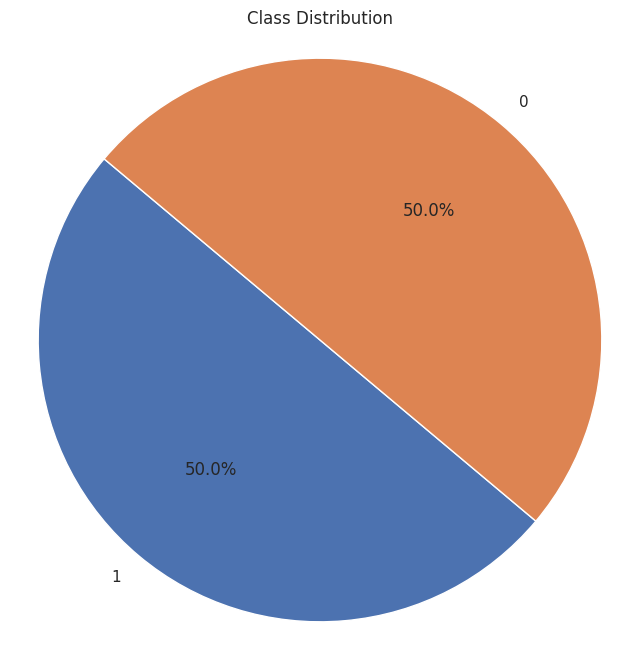

In [ ]:
class_counts = y_fasttext.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(word_lists)

# Vocabulary (words) with their corresponding TF-IDF vectors
vocabulary = tfidf_vectorizer.get_feature_names_out()

# TF-IDF vectors for each word in the vocabulary
word_embeddings = tfidf_vectorizer.idf_

In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words=stop_words)
X_tfidf = vectorizer.fit_transform(X[0])

In [ ]:
# Resample
X_tfidf, y_tfidf = resample.fit_resample(X_tfidf, y)

In [ ]:
X_tfidf.shape, y_tfidf.shape

((2716, 10820), (2716,))

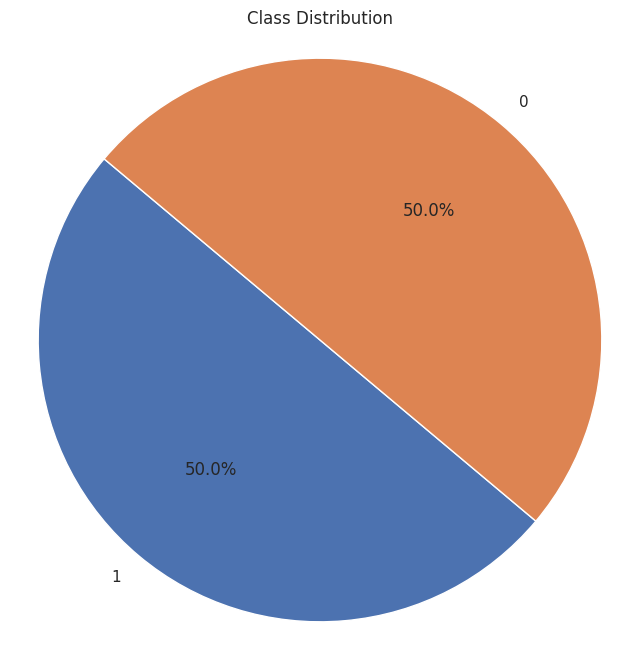

In [ ]:
class_counts = y_tfidf.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

## Train-Test Split

In [ ]:
# Split for fasttext
X_ft_train, X_ft_test, y_ft_train, y_ft_test = train_test_split(X_fasttext,y_fasttext, test_size=0.3, random_state=42, stratify=y_fasttext)

In [ ]:
y_ft_train = y_ft_train.reset_index(drop=True)
y_ft_test = y_ft_test.reset_index(drop=True)

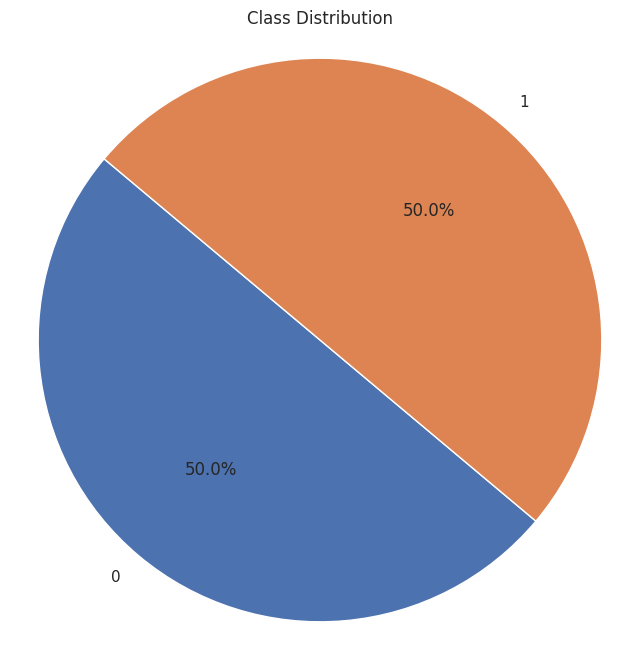

In [ ]:
class_counts = y_ft_train.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Split for TF-IDF
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf,y_tfidf,test_size=0.3, random_state=True, stratify=y_tfidf)

In [ ]:
y_tfidf_train = y_tfidf_train.reset_index(drop=True)
y_tfidf_test = y_tfidf_test.reset_index(drop=True)

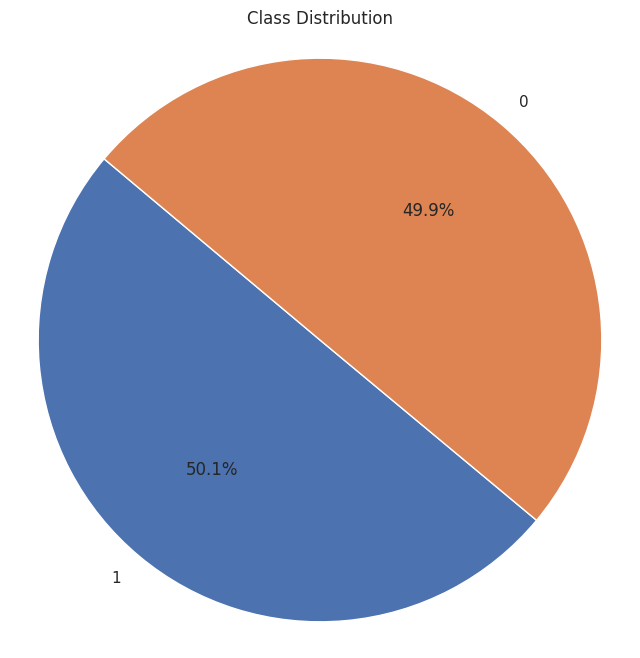

In [ ]:
class_counts = y_tfidf_test.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

# Model
In our model we will use Continous Bag Of Words (CBOW) for our fasttext model and TF-IDF for our word embeding. On the other hand we will use both random forest and SVM for our classifications needs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import fasttext

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

# Define cross-validation for SVM
def run_cross_validation_svm(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []
    for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train SVM classifier
        svm_classifier = SVC(kernel='linear',probability=True)
        svm_classifier.fit(X_train, y_train)

        # Predict on validation set
        y_pred = svm_classifier.predict(X_val)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_val, y_pred)
        report = classification_report(y_val, y_pred, output_dict=True, zero_division=1)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']

        # Calculate ROC AUC score
        y_prob = svm_classifier.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_prob)

        # Append scores
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        roc_auc_scores.append(roc_auc)

        # Plot confusion matrix
        plot_confusion_matrix(y_val, y_pred,labels=[0,1])

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        roc_display.plot()
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()

    # Calculate average scores
    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_roc_auc = np.mean(roc_auc_scores)

    return avg_accuracy, avg_precision, avg_recall, avg_f1, avg_roc_auc

# Define cross-validation for Random Forest
def run_cross_validation_rf(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []
    for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train Random Forest classifier
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(X_train, y_train)

        # Predict on validation set
        y_pred = rf_classifier.predict(X_val)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_val, y_pred)
        report = classification_report(y_val, y_pred, output_dict=True, zero_division=1)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']

        # Calculate ROC AUC score
        y_prob = rf_classifier.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_prob)

        # Append scores
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        roc_auc_scores.append(roc_auc)

        # Plot confusion matrix
        plot_confusion_matrix(y_val, y_pred, labels=[0, 1])

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        roc_display.plot()
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()

    # Calculate average scores
    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_roc_auc = np.mean(roc_auc_scores)

    return avg_accuracy, avg_precision, avg_recall, avg_f1, avg_roc_auc


# Validation

TF-IDF + SVM Classifier:


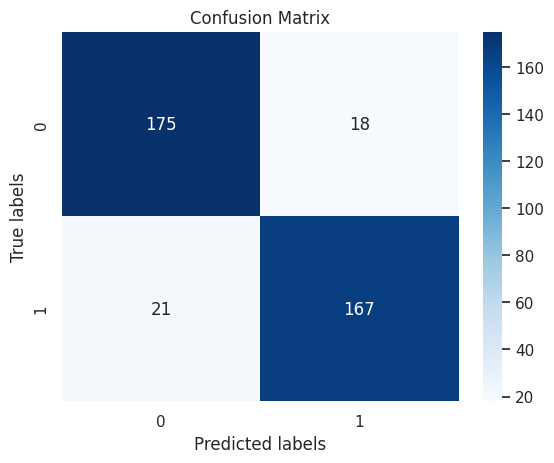

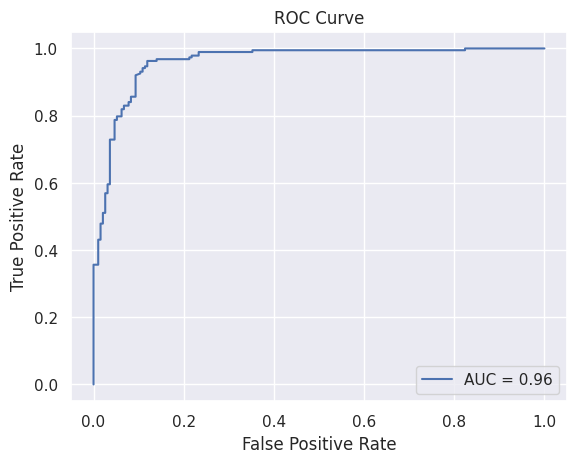

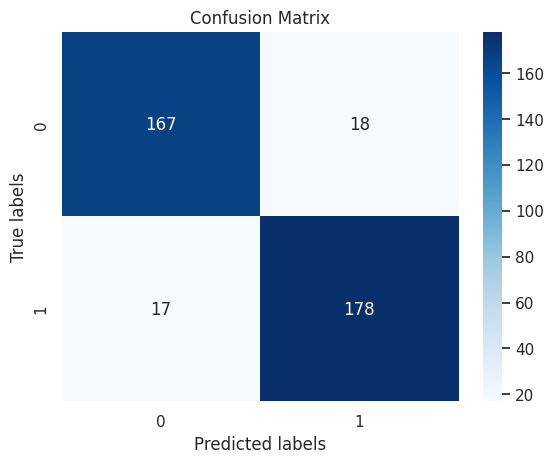

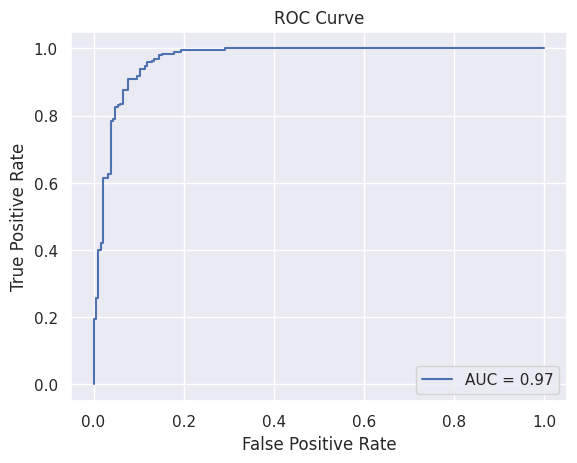

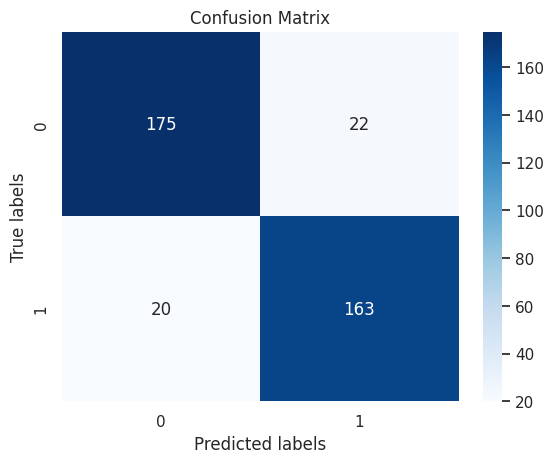

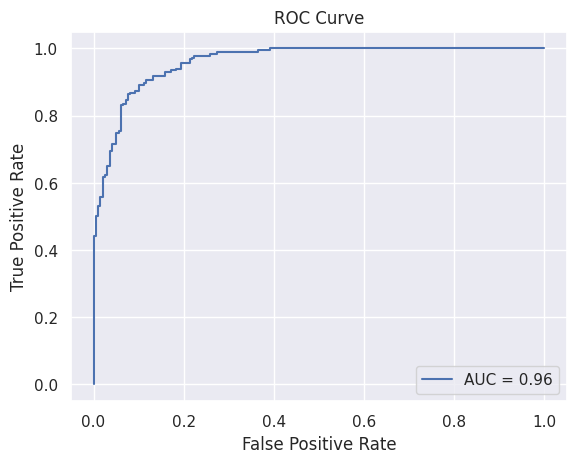

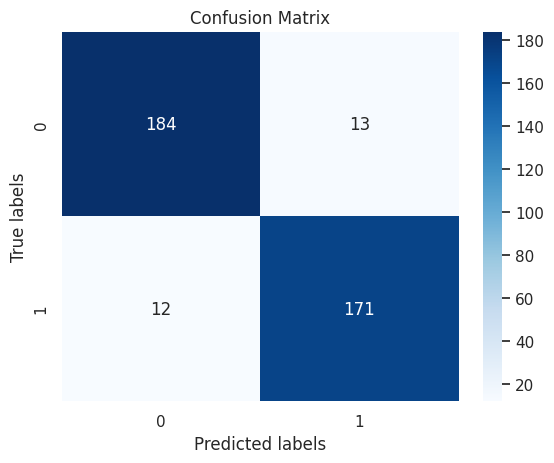

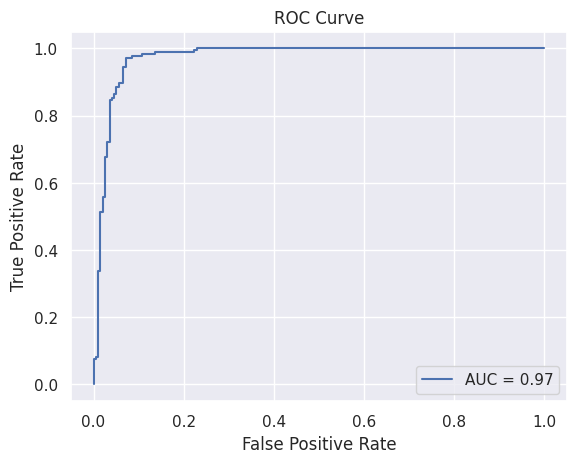

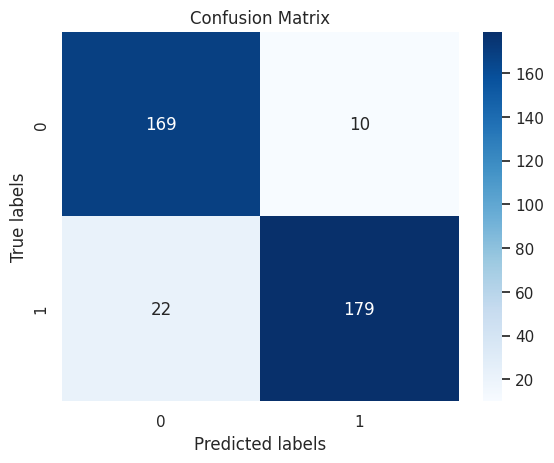

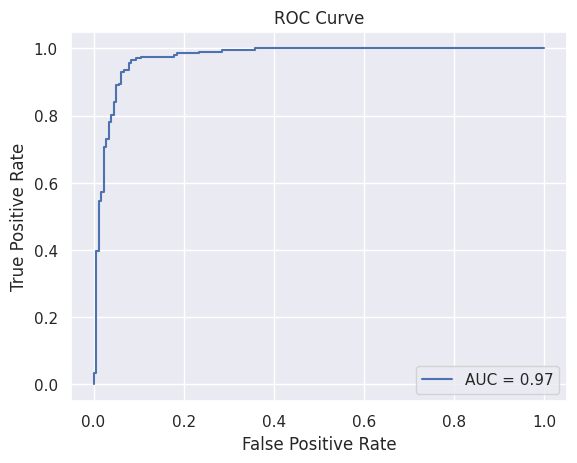

Average Accuracy: 0.9090012432656444
Average Precision: 0.913676964453362
Average Recall: 0.9033604521728776
Average F1-score: 0.9083253369822202
Average ROC AUC score: 0.9669801445592299

FastText + SVM Classifier:


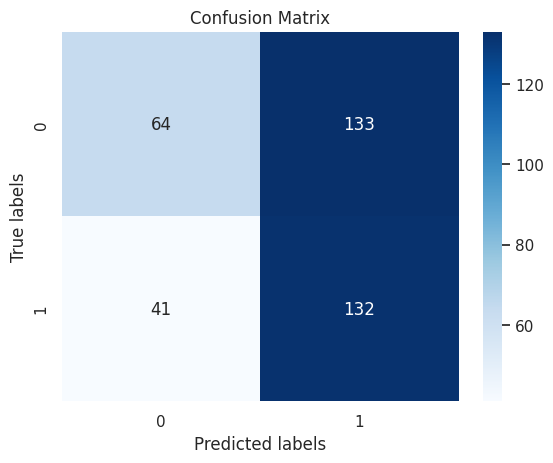

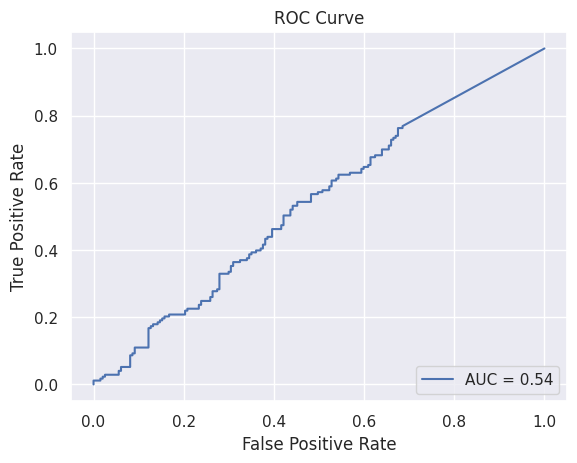

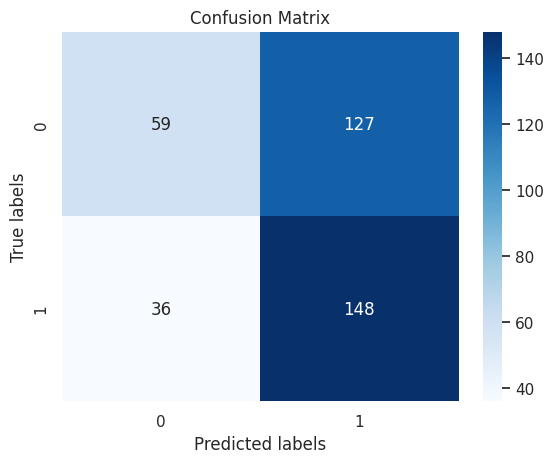

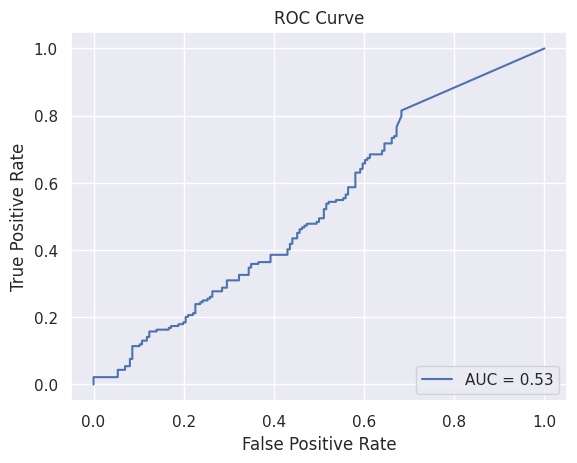

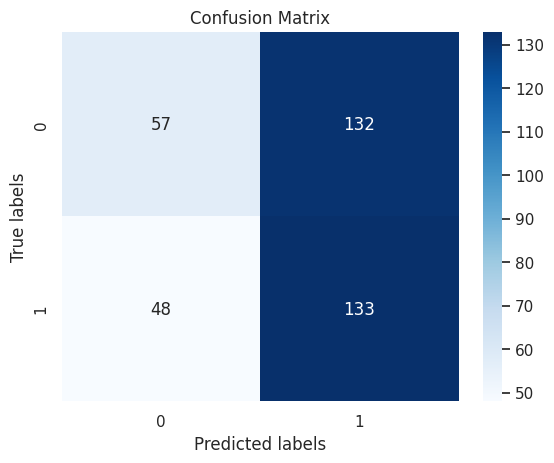

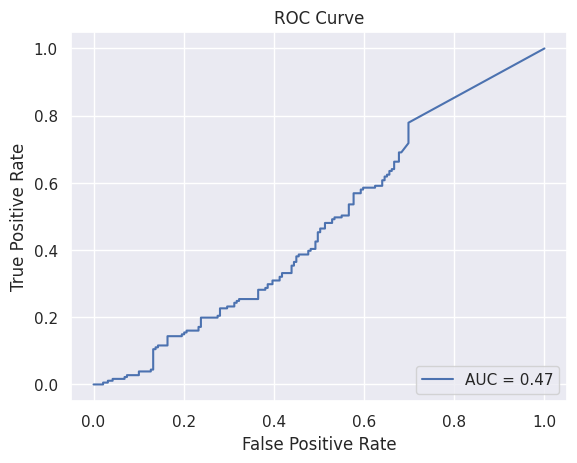

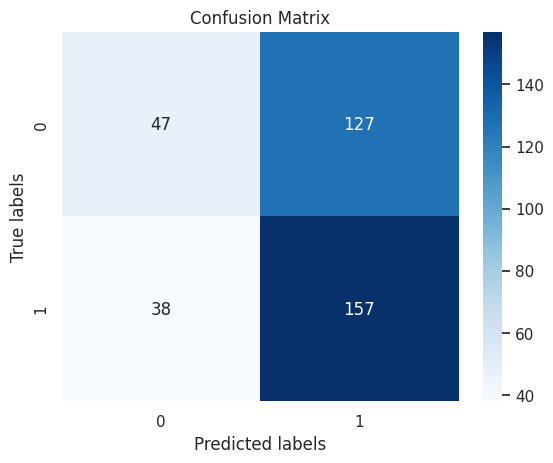

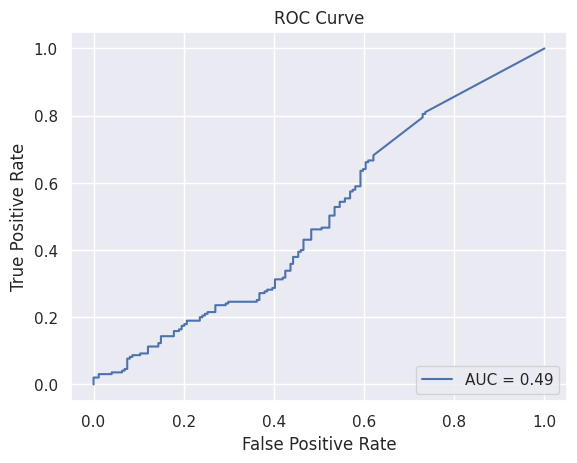

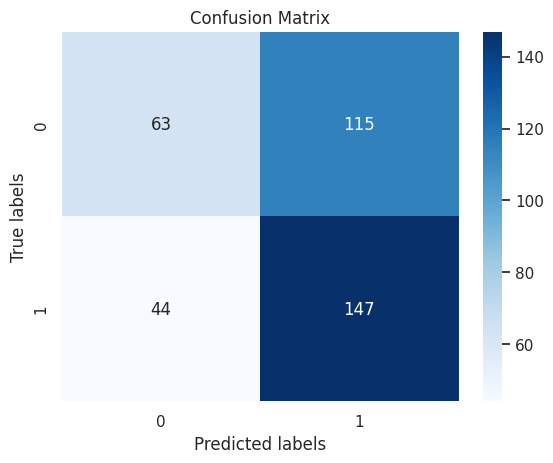

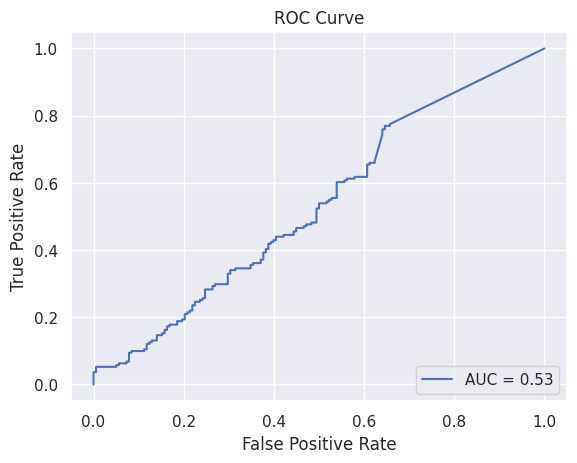

Average Accuracy: 0.5449307844429795
Average Precision: 0.530413484376069
Average Recall: 0.775384389849928
Average F1-score: 0.6297142875942248
Average ROC AUC score: 0.5134083093834925

TF-IDF + Random Forest Classifier:


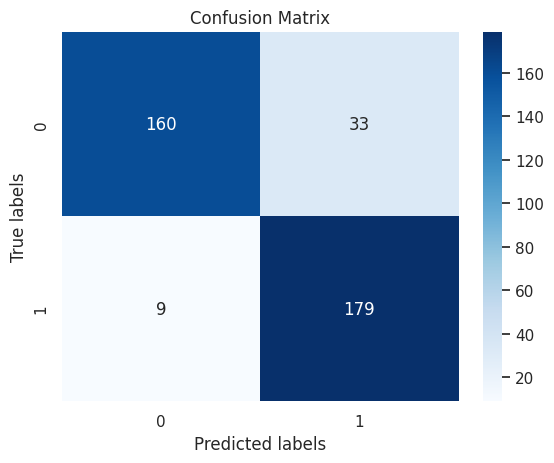

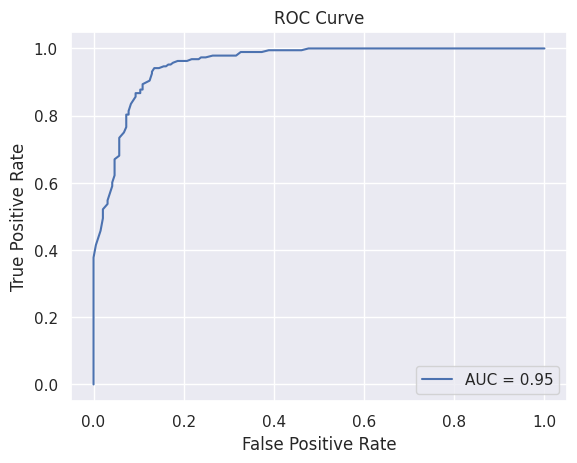

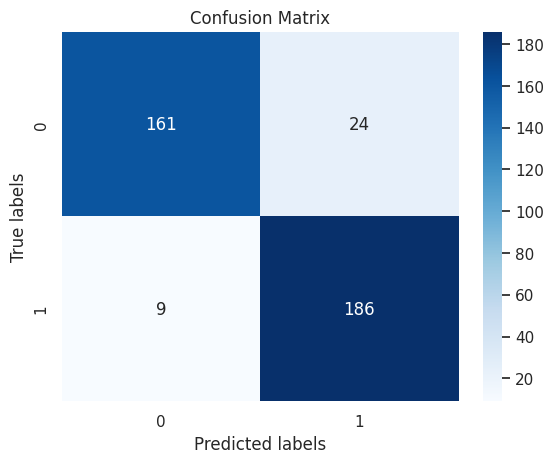

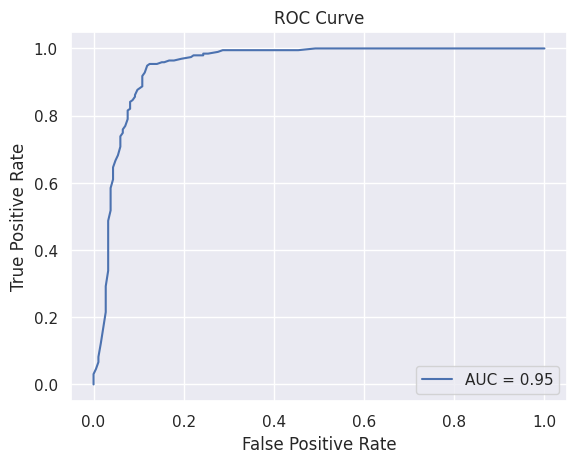

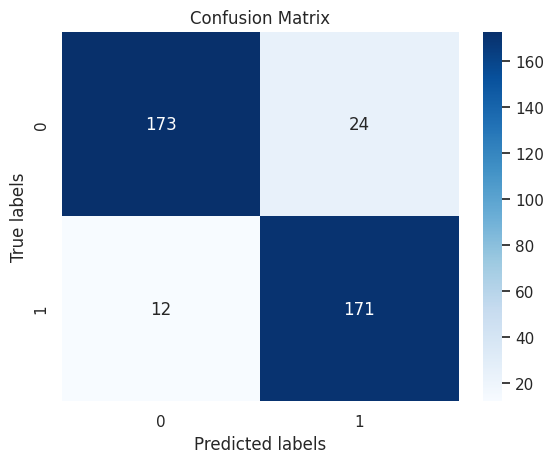

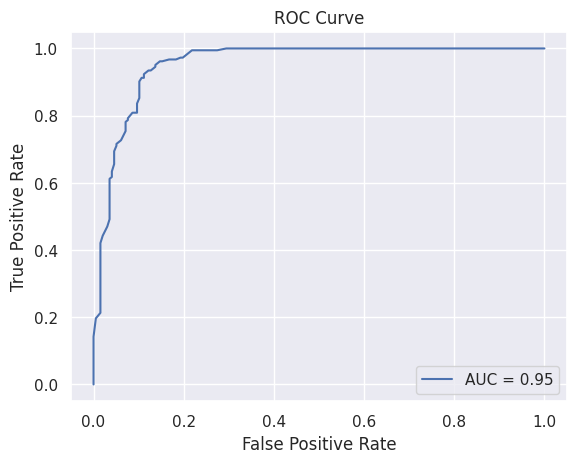

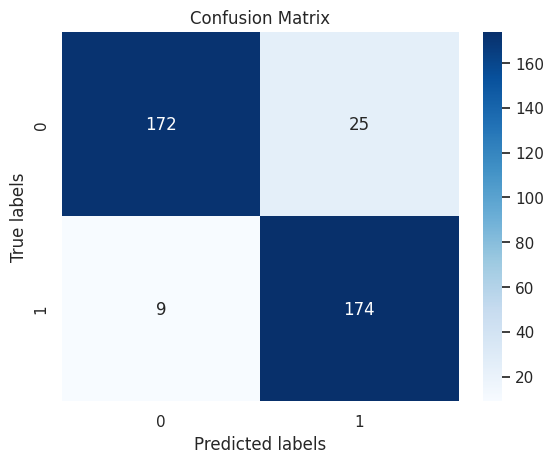

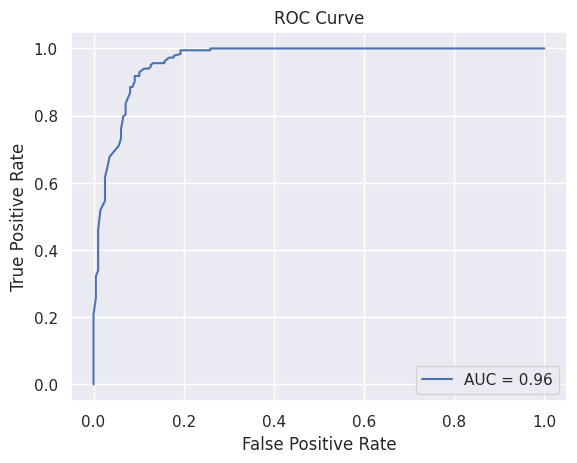

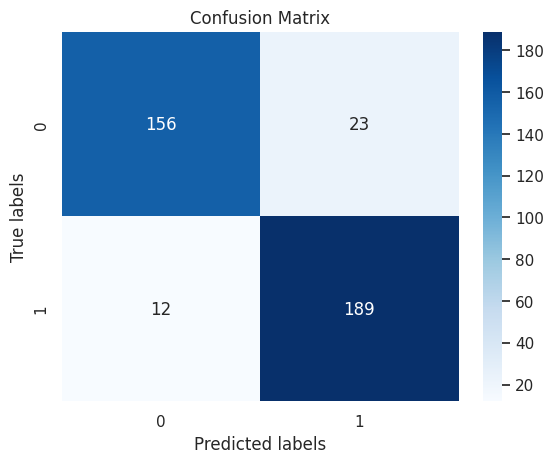

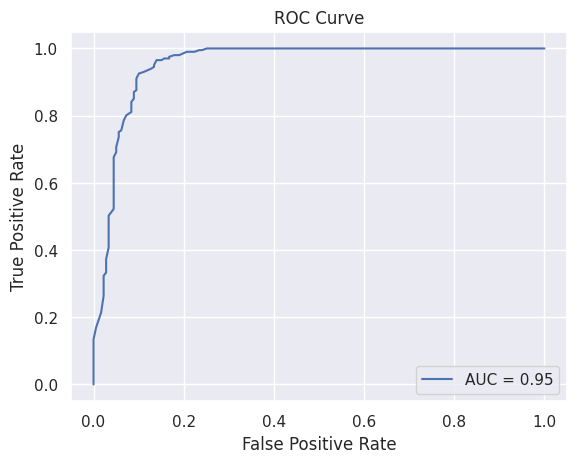

Average Accuracy: 0.9053211769581434
Average Precision: 0.8745716557075237
Average Recall: 0.9463036445045304
Average F1-score: 0.908905884993293
Average ROC AUC score: 0.9548559067117743

FastText + Random Forest Classifier:


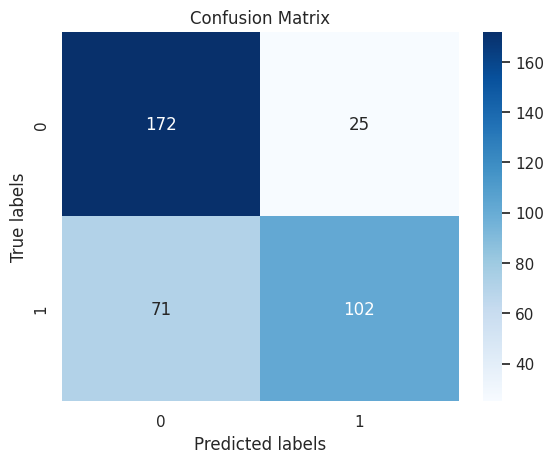

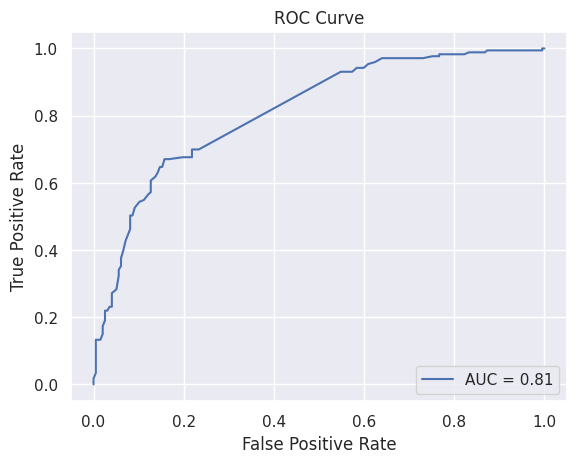

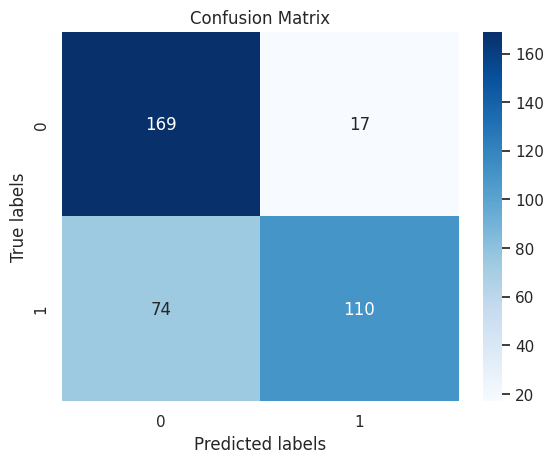

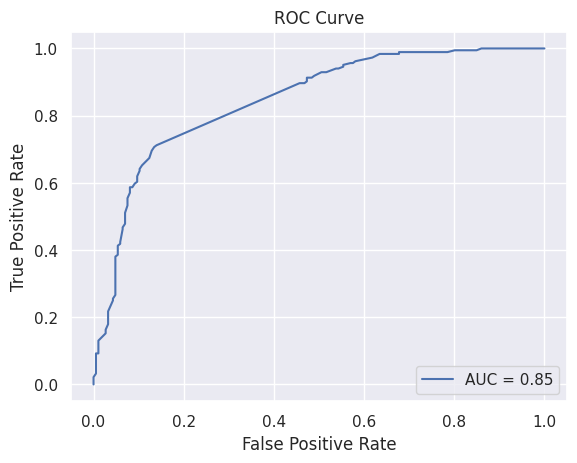

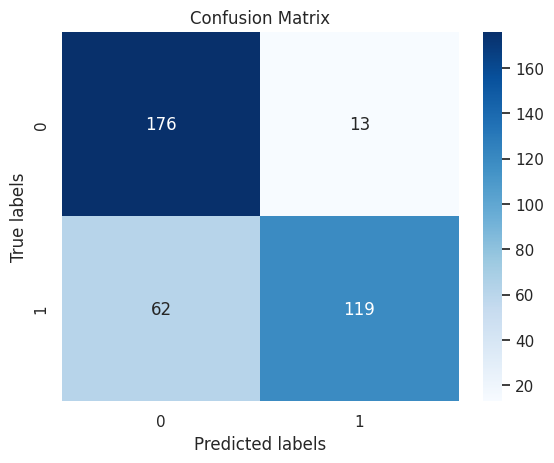

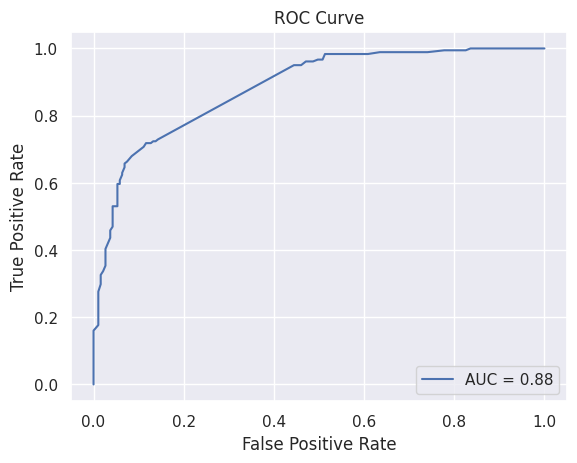

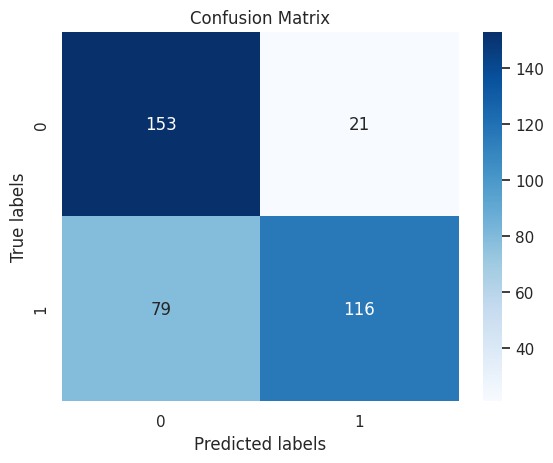

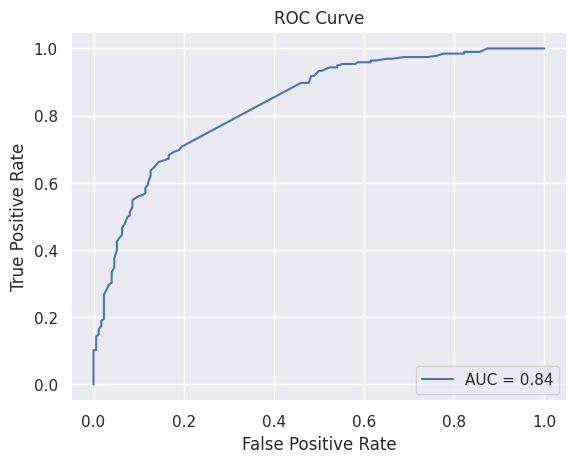

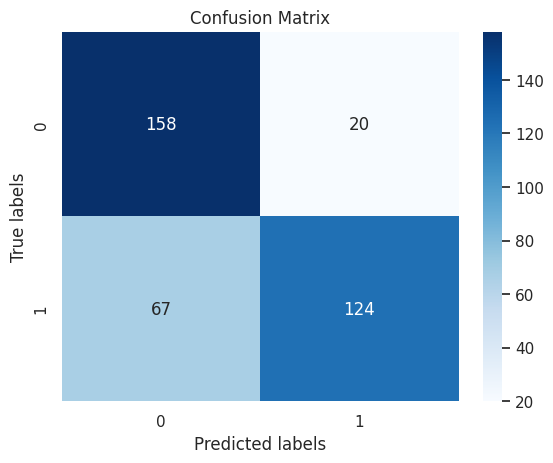

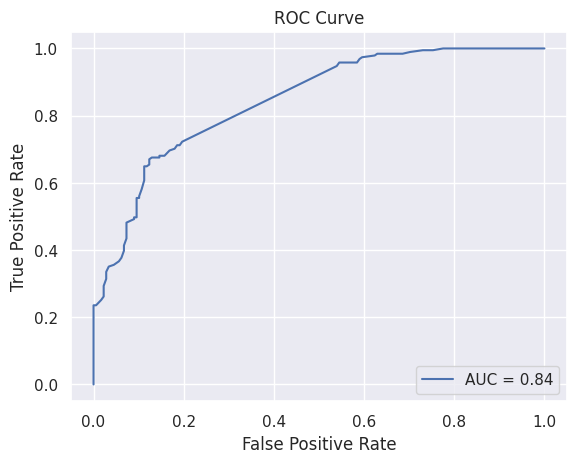

Average Accuracy: 0.7570233648282428
Average Precision: 0.8557265859352186
Average Recall: 0.6177932961545272
Average F1-score: 0.7173745146318662
Average ROC AUC score: 0.8450171039357969


In [ ]:
# Model evaluation
print("TF-IDF + SVM Classifier:")
avg_accuracy_tfidf_svm, avg_precision_tfidf_svm, avg_recall_tfidf_svm, avg_f1_tfidf_svm, avg_roc_auc_tfidf_svm = run_cross_validation_svm(X_tfidf_train, y_tfidf_train)
print("Average Accuracy:", avg_accuracy_tfidf_svm)
print("Average Precision:", avg_precision_tfidf_svm)
print("Average Recall:", avg_recall_tfidf_svm)
print("Average F1-score:", avg_f1_tfidf_svm)
print("Average ROC AUC score:", avg_roc_auc_tfidf_svm)

print("\nFastText + SVM Classifier:")
avg_accuracy_fasttext_svm, avg_precision_fasttext_svm, avg_recall_fasttext_svm, avg_f1_fasttext_svm, avg_roc_auc_fasttext_svm = run_cross_validation_svm(X_ft_train, y_ft_train)
print("Average Accuracy:", avg_accuracy_fasttext_svm)
print("Average Precision:", avg_precision_fasttext_svm)
print("Average Recall:", avg_recall_fasttext_svm)
print("Average F1-score:", avg_f1_fasttext_svm)
print("Average ROC AUC score:", avg_roc_auc_fasttext_svm)

print("\nTF-IDF + Random Forest Classifier:")
avg_accuracy_tfidf_rf, avg_precision_tfidf_rf, avg_recall_tfidf_rf, avg_f1_tfidf_rf, avg_roc_auc_tfidf_rf = run_cross_validation_rf(X_tfidf_train, y_tfidf_train)
print("Average Accuracy:", avg_accuracy_tfidf_rf)
print("Average Precision:", avg_precision_tfidf_rf)
print("Average Recall:", avg_recall_tfidf_rf)
print("Average F1-score:", avg_f1_tfidf_rf)
print("Average ROC AUC score:", avg_roc_auc_tfidf_rf)

print("\nFastText + Random Forest Classifier:")
avg_accuracy_fasttext_rf, avg_precision_fasttext_rf, avg_recall_fasttext_rf, avg_f1_fasttext_rf, avg_roc_auc_fasttext_rf = run_cross_validation_rf(X_ft_train, y_ft_train)
print("Average Accuracy:", avg_accuracy_fasttext_rf)
print("Average Precision:", avg_precision_fasttext_rf)
print("Average Recall:", avg_recall_fasttext_rf)
print("Average F1-score:", avg_f1_fasttext_rf)
print("Average ROC AUC score:", avg_roc_auc_fasttext_rf)

# Test and Evaluations

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

# Train and evaluate SVM classifier
def evaluate_svm(X_train, X_test, y_train, y_test):
    svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
    svm_classifier.fit(X_train, y_train)

    # Predict on test set
    y_pred = svm_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    # Calculate ROC AUC score
    y_prob = svm_classifier.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot()
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    return accuracy, precision, recall, f1, roc_auc

# Train and evaluate Random Forest classifier
def evaluate_rf(X_train, X_test, y_train, y_test):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    # Calculate ROC AUC score
    y_prob = rf_classifier.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot()
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    return accuracy, precision, recall, f1, roc_auc


TF-IDF + SVM Classifier:


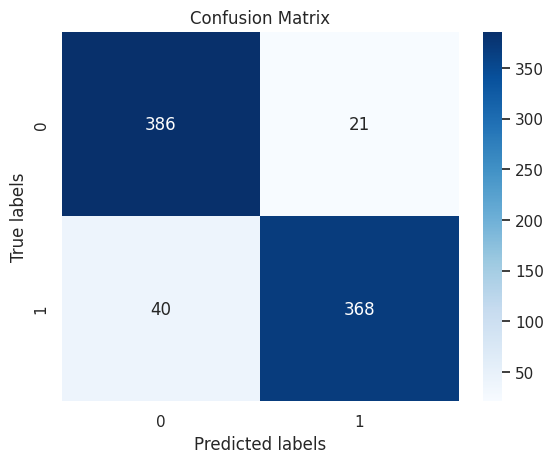

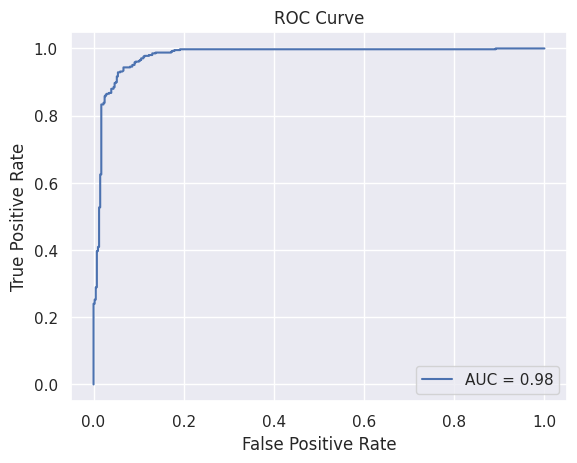

Accuracy: 0.9251533742331288
Precision: 0.9460154241645244
Recall: 0.9019607843137255
F1-score: 0.9234629861982434
ROC AUC score: 0.9790522474346004


In [ ]:
#TF-IDF + SVM Classifier
print("TF-IDF + SVM Classifier:")
avg_accuracy_tfidf_svm, avg_precision_tfidf_svm, avg_recall_tfidf_svm, avg_f1_tfidf_svm, avg_roc_auc_tfidf_svm = evaluate_svm(X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test)
print("Accuracy:", avg_accuracy_tfidf_svm)
print("Precision:", avg_precision_tfidf_svm)
print("Recall:", avg_recall_tfidf_svm)
print("F1-score:", avg_f1_tfidf_svm)
print("ROC AUC score:", avg_roc_auc_tfidf_svm)


FastText + SVM Classifier:


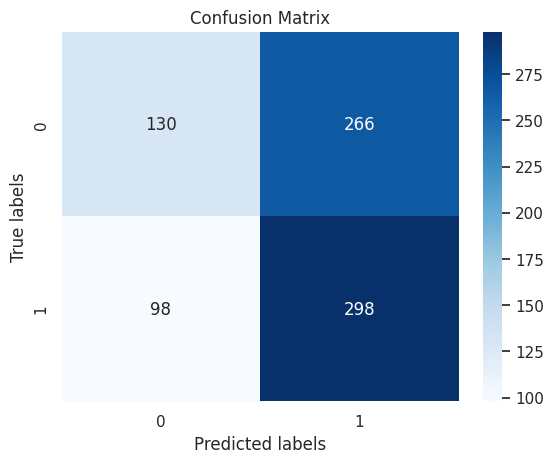

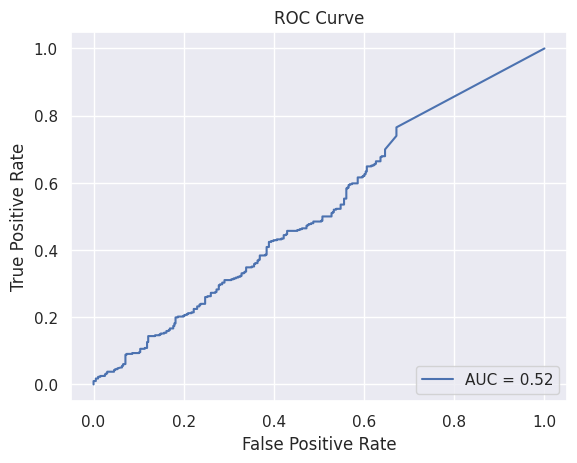

Accuracy: 0.5404040404040404
Precision: 0.5283687943262412
Recall: 0.7525252525252525
F1-score: 0.6208333333333332
ROC AUC score: 0.5208428986838077


In [ ]:
#FastText + SVM Classifier
print("\nFastText + SVM Classifier:")
avg_accuracy_fasttext_svm, avg_precision_fasttext_svm, avg_recall_fasttext_svm, avg_f1_fasttext_svm, avg_roc_auc_fasttext_svm = evaluate_svm(X_ft_train, X_ft_test, y_ft_train, y_ft_test)
print("Accuracy:", avg_accuracy_fasttext_svm)
print("Precision:", avg_precision_fasttext_svm)
print("Recall:", avg_recall_fasttext_svm)
print("F1-score:", avg_f1_fasttext_svm)
print("ROC AUC score:", avg_roc_auc_fasttext_svm)


TF-IDF + Random Forest Classifier:


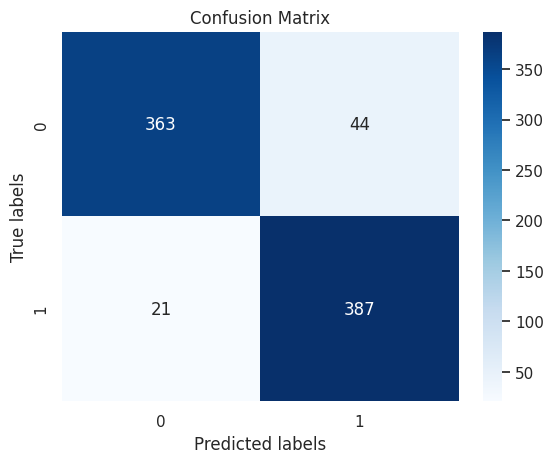

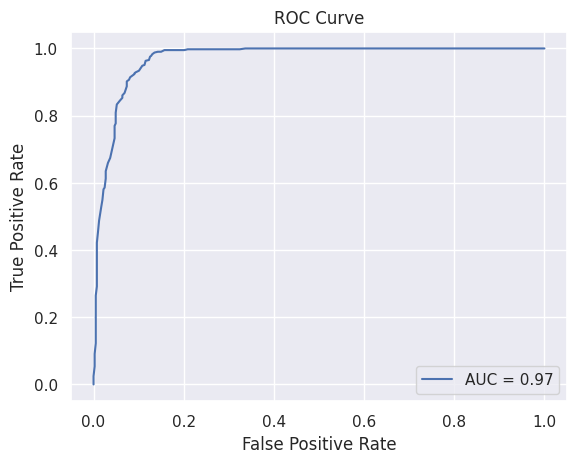

Accuracy: 0.9202453987730062
Precision: 0.8979118329466357
Recall: 0.9485294117647058
F1-score: 0.9225268176400477
ROC AUC score: 0.9696698704051645


In [ ]:
#TF-IDF + Random Forest Classifier
print("\nTF-IDF + Random Forest Classifier:")
avg_accuracy_tfidf_rf, avg_precision_tfidf_rf, avg_recall_tfidf_rf, avg_f1_tfidf_rf, avg_roc_auc_tfidf_rf = evaluate_rf(X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test)
print("Accuracy:", avg_accuracy_tfidf_rf)
print("Precision:", avg_precision_tfidf_rf)
print("Recall:", avg_recall_tfidf_rf)
print("F1-score:", avg_f1_tfidf_rf)
print("ROC AUC score:", avg_roc_auc_tfidf_rf)


FastText + Random Forest Classifier:


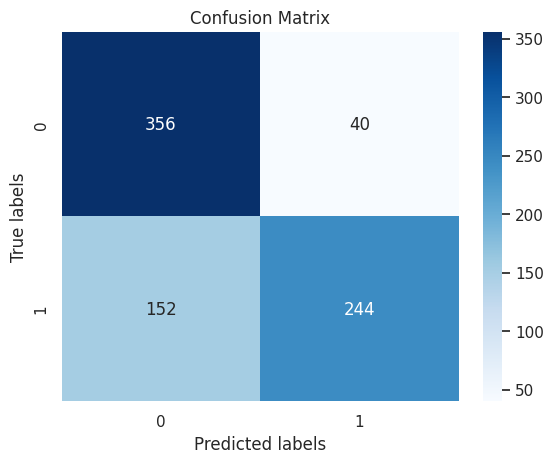

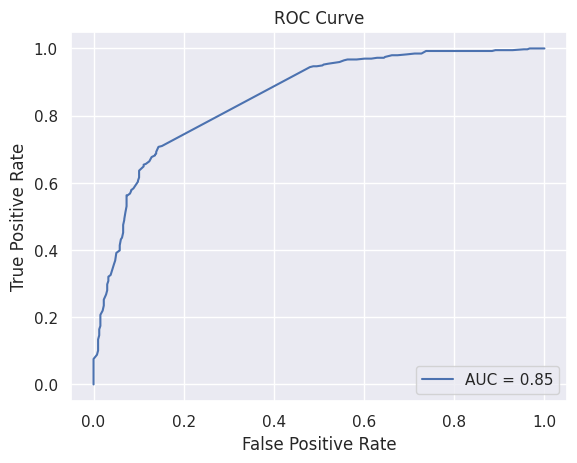

Accuracy: 0.7575757575757576
Precision: 0.8591549295774648
Recall: 0.6161616161616161
F1-score: 0.7176470588235293
ROC AUC score: 0.8547023262932354


In [ ]:
#FastText + Random Forest Classifier
print("\nFastText + Random Forest Classifier:")
avg_accuracy_fasttext_rf, avg_precision_fasttext_rf, avg_recall_fasttext_rf, avg_f1_fasttext_rf, avg_roc_auc_fasttext_rf = evaluate_rf(X_ft_train, X_ft_test, y_ft_train, y_ft_test)
print("Accuracy:", avg_accuracy_fasttext_rf)
print("Precision:", avg_precision_fasttext_rf)
print("Recall:", avg_recall_fasttext_rf)
print("F1-score:", avg_f1_fasttext_rf)
print("ROC AUC score:", avg_roc_auc_fasttext_rf)

# For Model Deployment

We will use TF-IDF + SVM and with the help of joblib to export our pipeline

In [ ]:
import re
import string
import emoji
from sklearn.base import BaseEstimator, TransformerMixin

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [self._preprocess_text(text) for text in X]

    def _preprocess_text(self, text):
        # Remove emojis
        text = emoji.replace_emoji(text, replace='')
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text


In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X_tfidf = vectorizer.fit_transform(X[0])

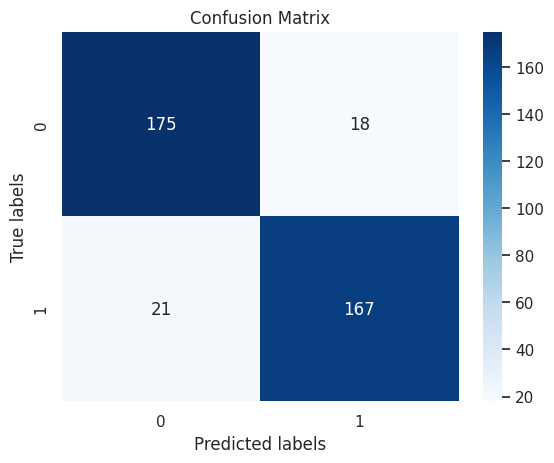

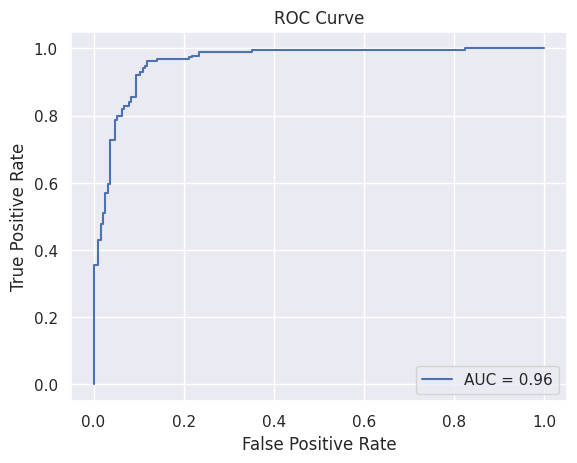

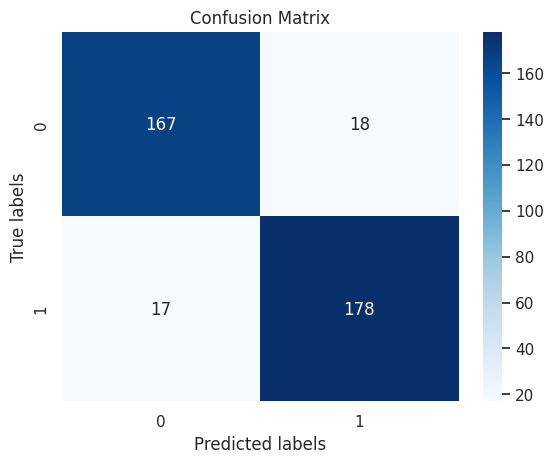

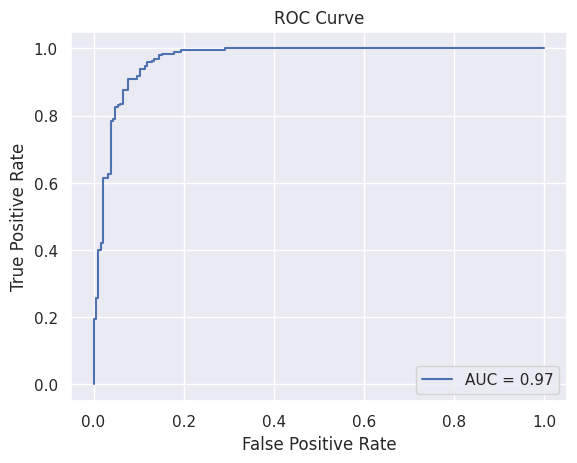

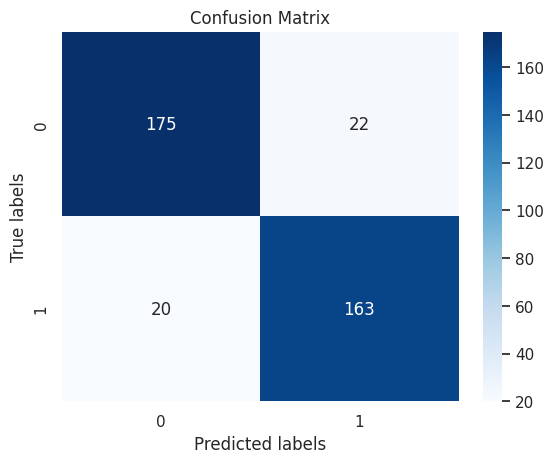

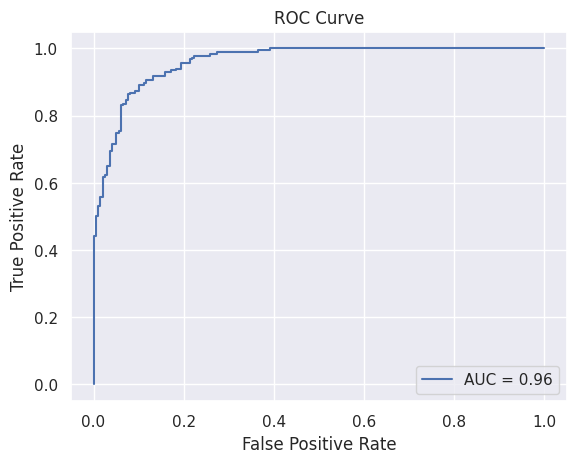

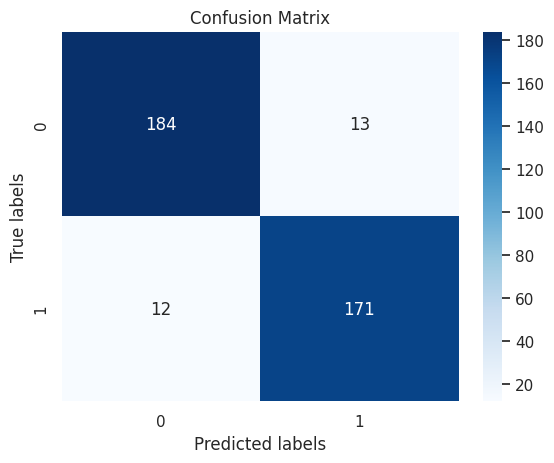

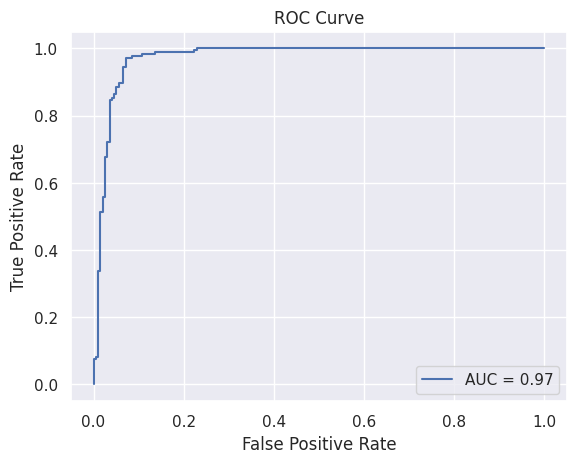

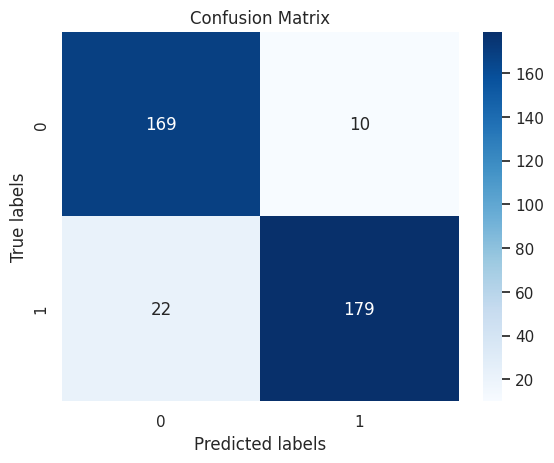

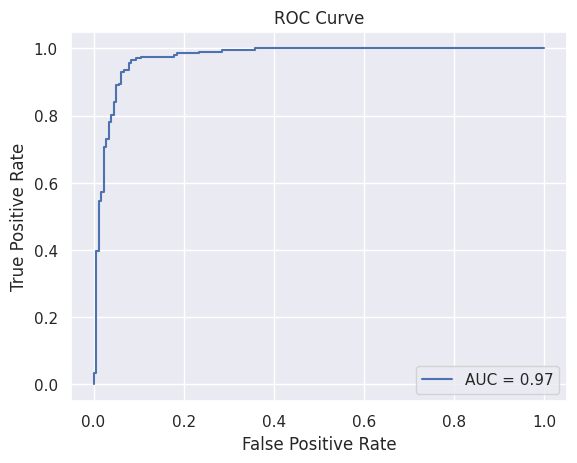

Average Accuracy: 0.9090012432656444
Average Precision: 0.913676964453362
Average Recall: 0.9033604521728776
Average F1-score: 0.9083253369822202
Average ROC AUC score: 0.9669746324877935


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import joblib

# Here I am going to just retrain the SVC model
# For ease of training

svc = SVC(kernel='linear',probability=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_tfidf_train, y_tfidf_train)):
  X_train, X_val = X_tfidf_train[train_index], X_tfidf_train[val_index]
  y_train, y_val = y_tfidf_train[train_index], y_tfidf_train[val_index]

  # Train SVM classifier
  svc.fit(X_train, y_train)

  # Predict on validation set
  y_pred = svc.predict(X_val)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_val, y_pred)
  report = classification_report(y_val, y_pred, output_dict=True, zero_division=1)
  precision = report['1']['precision']
  recall = report['1']['recall']
  f1 = report['1']['f1-score']

  # Calculate ROC AUC score
  y_prob = svc.predict_proba(X_val)[:, 1]
  roc_auc = roc_auc_score(y_val, y_prob)

  # Append scores
  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)
  roc_auc_scores.append(roc_auc)

  # Plot confusion matrix
  plot_confusion_matrix(y_val, y_pred,labels=[0,1])

  # Plot ROC curve
  fpr, tpr, _ = roc_curve(y_val, y_prob)
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
  roc_display.plot()
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

  # Calculate average scores
  avg_accuracy = np.mean(accuracy_scores)
  avg_precision = np.mean(precision_scores)
  avg_recall = np.mean(recall_scores)
  avg_f1 = np.mean(f1_scores)
  avg_roc_auc = np.mean(roc_auc_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-score:", avg_f1)
print("Average ROC AUC score:", avg_roc_auc)

In [ ]:
# Export model
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('svc',svc)
])

joblib.dump(pipeline, 'news_hoax_classification.joblib')

['news_hoax_classification.joblib']

In [ ]:
# Try Inference
load_pipeline = joblib.load('news_hoax_classification.joblib')
text = ['Sandi Sarankan Warga Ngadu ke Kelurahan Saja	']
prediction = load_pipeline.predict(text)
probability = load_pipeline.predict_proba(text)
print(f'Prediction: {prediction}')
print(f'Probability: {probability}')
# 1 for hoax

Prediction: [0]
Probability: [[0.47300026 0.52699974]]
